##### Step 1 - Import necessary libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

#### Step 2 - Import data and create a pandas dataframe

In [79]:
df = pd.read_csv(r'data/marketing-data.csv')

### PREPROCESS

#### Step 3 - Get general information of the dataset

In [80]:
# Use the head() method to display the first few rows of the data.
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [81]:
# Use the tail() method to display the last few rows of the data.
df.tail()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,NaN,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium
4999,CAM5000,TV,Automotive,Sabah,476378.0,261529.0,308009.000,45922.0,0.5187,3047.0,0.0438,146303.0,0.770000,330.0,1/1/2023,6/11/2023,1.0,1.0,High


In [82]:
#Use the shape attribute to display the number of rows and columns in the data.
df.shape

(5000, 19)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Campaign_ID             5000 non-null   object        
 1   Channel                 5000 non-null   object        
 2   Product_Category        5000 non-null   object        
 3   Region                  5000 non-null   object        
 4   Budget                  5000 non-null   float64       
 5   Spend                   5000 non-null   float64       
 6   Impressions             5000 non-null   float64       
 7   Clicks                  5000 non-null   float64       
 8   CTR                     5000 non-null   float64       
 9   Conversions             5000 non-null   float64       
 10  CR                      5000 non-null   float64       
 11  Revenue                 5000 non-null   float64       
 12  ROI                     5000 non-null   float64 

### Step 4 - Data cleansing

"Data cleansing or data cleaning is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset, table, or database. It involves detecting incomplete, incorrect, or inaccurate parts of the data and then replacing, modifying, or deleting the affected data." Wu, S. (2013)

In [84]:
#Use the duplicated() method to count the number of duplicate rows in the data.
#We see that there are no duplicated rows in the data.
duplicated = df.duplicated().sum()
int(duplicated)

0

In [85]:
#Use isnull() and sum() methods to count the number of missing values in each column.
isnull = df.isnull().sum()
isnull

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

#### Using a heatmap to visualize missing values

<Axes: >

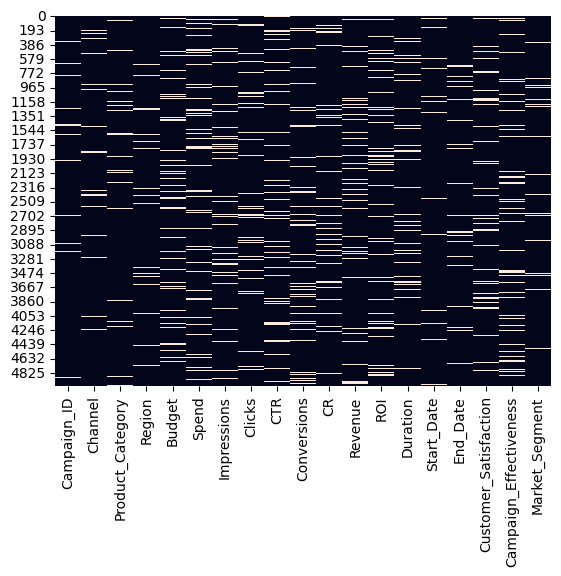

In [86]:
#Use a heatmap to visualize the missing values in the data.
sns.heatmap(df.isnull(), cbar=False)

In [87]:
#Use the isnull() and sum() methods to calculate the percentage of missing values in each column. 
#This will tell us if there are any columns with a high percentage of missing values.
#As a rule of thumb, columns with more than 30% missing values are usually removed from the data. 
df.isnull().sum() / df.shape[0] * 100

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64

#### 4.1 Fixing the null values

##### Campaign_ID null values

In [88]:
#Since the campaign_id column follows a pattern, we can fill in the missing values easily.
df['Campaign_ID'].fillna(df.index.to_series().apply(lambda x: f'CAM{x+1:04d}'), inplace=True)

In [89]:
#As we can see, the missing values in the Campaign_ID column have been filled in and there are no missing values in the column.
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

#### Start_date, End_date and Duration columns' null values

In [90]:
#To fix the missing values in the Start_Date, End_Date columns and Duration columns, we can follow these steps:

# Convert columns to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y', errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d/%m/%Y', errors='coerce')

In [91]:
#We check the range of the dates in the Start_Date column and the End_Date column
min_start_date = df['Start_Date'].min()
max_start_date = df['Start_Date'].max()
min_end_date = df['End_Date'].min()
max_end_date = df['End_Date'].max()
min_start_date, max_start_date, min_end_date, max_end_date

(Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'))

In [92]:
#Get the mode of the Start_Date column and the End_Date column
start_date_mode = df['Start_Date'].mode()
end_date_mode = df['End_Date'].mode()

print('Mode Start_Date:', start_date_mode)
print('Mode End_Date:', end_date_mode)


Mode Start_Date: 0   2023-07-21
1   2023-09-11
Name: Start_Date, dtype: datetime64[ns]
Mode End_Date: 0   2023-07-07
Name: End_Date, dtype: datetime64[ns]


In [93]:
#Fill in the missing values in the Start_Date column and the End_Date column with the mode value.
df['Start_Date'].fillna(start_date_mode[0], inplace=True)
df['End_Date'].fillna(end_date_mode[0], inplace=True)

In [94]:
#Getting the average of the duration column
avg_duration = df['Duration'].mean().round(2)

#Getting the median of the duration column
median_duration = df['Duration'].median().round(2)

#Gett the mode of the duration column
mode_duration = df['Duration'].mode().round(2)

print('Average Duration:', avg_duration)
print('Median Duration:', median_duration)
print('Mode Duration:', mode_duration)

Average Duration: 200.59
Median Duration: 188.0
Mode Duration: 0    115.0
Name: Duration, dtype: float64


In this case, each of the central tendency values (median, mean, and mode) provides different insights:

Mean (194): Reflects the overall average but may be skewed by extreme values.

Median (182): Represents the midpoint of the data and is generally robust to outliers, providing a good balance for skewed distributions.

Mode (115): The most frequently occurring duration, useful if a significant portion of campaigns tend to last around this length.

Since we only need to fill in 38 rows (less than 1% of our data), using the median (182) would be a strong choice here. The median is less affected by outliers than the mean and often provides a more balanced approach, especially when the mean and median are relatively close, as they are here.

In [95]:
#We fill the missing values in the Duration column with the median value.
df['Duration'].fillna(median_duration, inplace=True)

In [96]:
#With this, we've removed the missing values in the Start_Date, End_Date, and Duration columns.
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

For the rest of the categorical columns, we will check the value counts to see how many times each value appears.

In [97]:
#check the value counts for all columns that contain categorical data
for column in df.select_dtypes(include='object'):
    if column != 'Campaign_ID':
        print(df[column].value_counts())

Channel
Billboard       990
Social Media    970
Radio           960
Email           928
TV              892
News              6
Name: count, dtype: int64
Product_Category
Electronics    978
Groceries      972
Health         951
Automotive     932
Fashion        900
Name: count, dtype: int64
Region
Kuala Lumpur    988
Sarawak         975
Sabah           927
Penang          922
Johor           914
Malacca          13
Name: count, dtype: int64
Market_Segment
High      1601
Medium    1592
Low       1545
Name: count, dtype: int64


In [98]:
#We check the mode for all columns that contain categorical data.
mode = df.select_dtypes(include='object').mode().iloc[0]
mode

Campaign_ID              CAM0001
Channel                Billboard
Product_Category     Electronics
Region              Kuala Lumpur
Market_Segment              High
Name: 0, dtype: object

In [99]:
#We fill the null values from the columns with categorial data using the mode. We exclude the Campaign_ID column because each value in this column is unique and because it is already filled.
for column in df.select_dtypes(include='object'):
    if column != 'Campaign_ID':
        df[column].fillna(df[column].mode()[0], inplace=True)

In [100]:
#Now the categorical columns have no missing values
isnull = df.isnull().sum()
isnull

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment              0
dtype: int64

#### Columns with numerical data

For the rest of the columns which contain numerical data, we'll check the histograms to see the distribution of the data. This will help us decide whether to use the median or the mean to fill the empty cells.

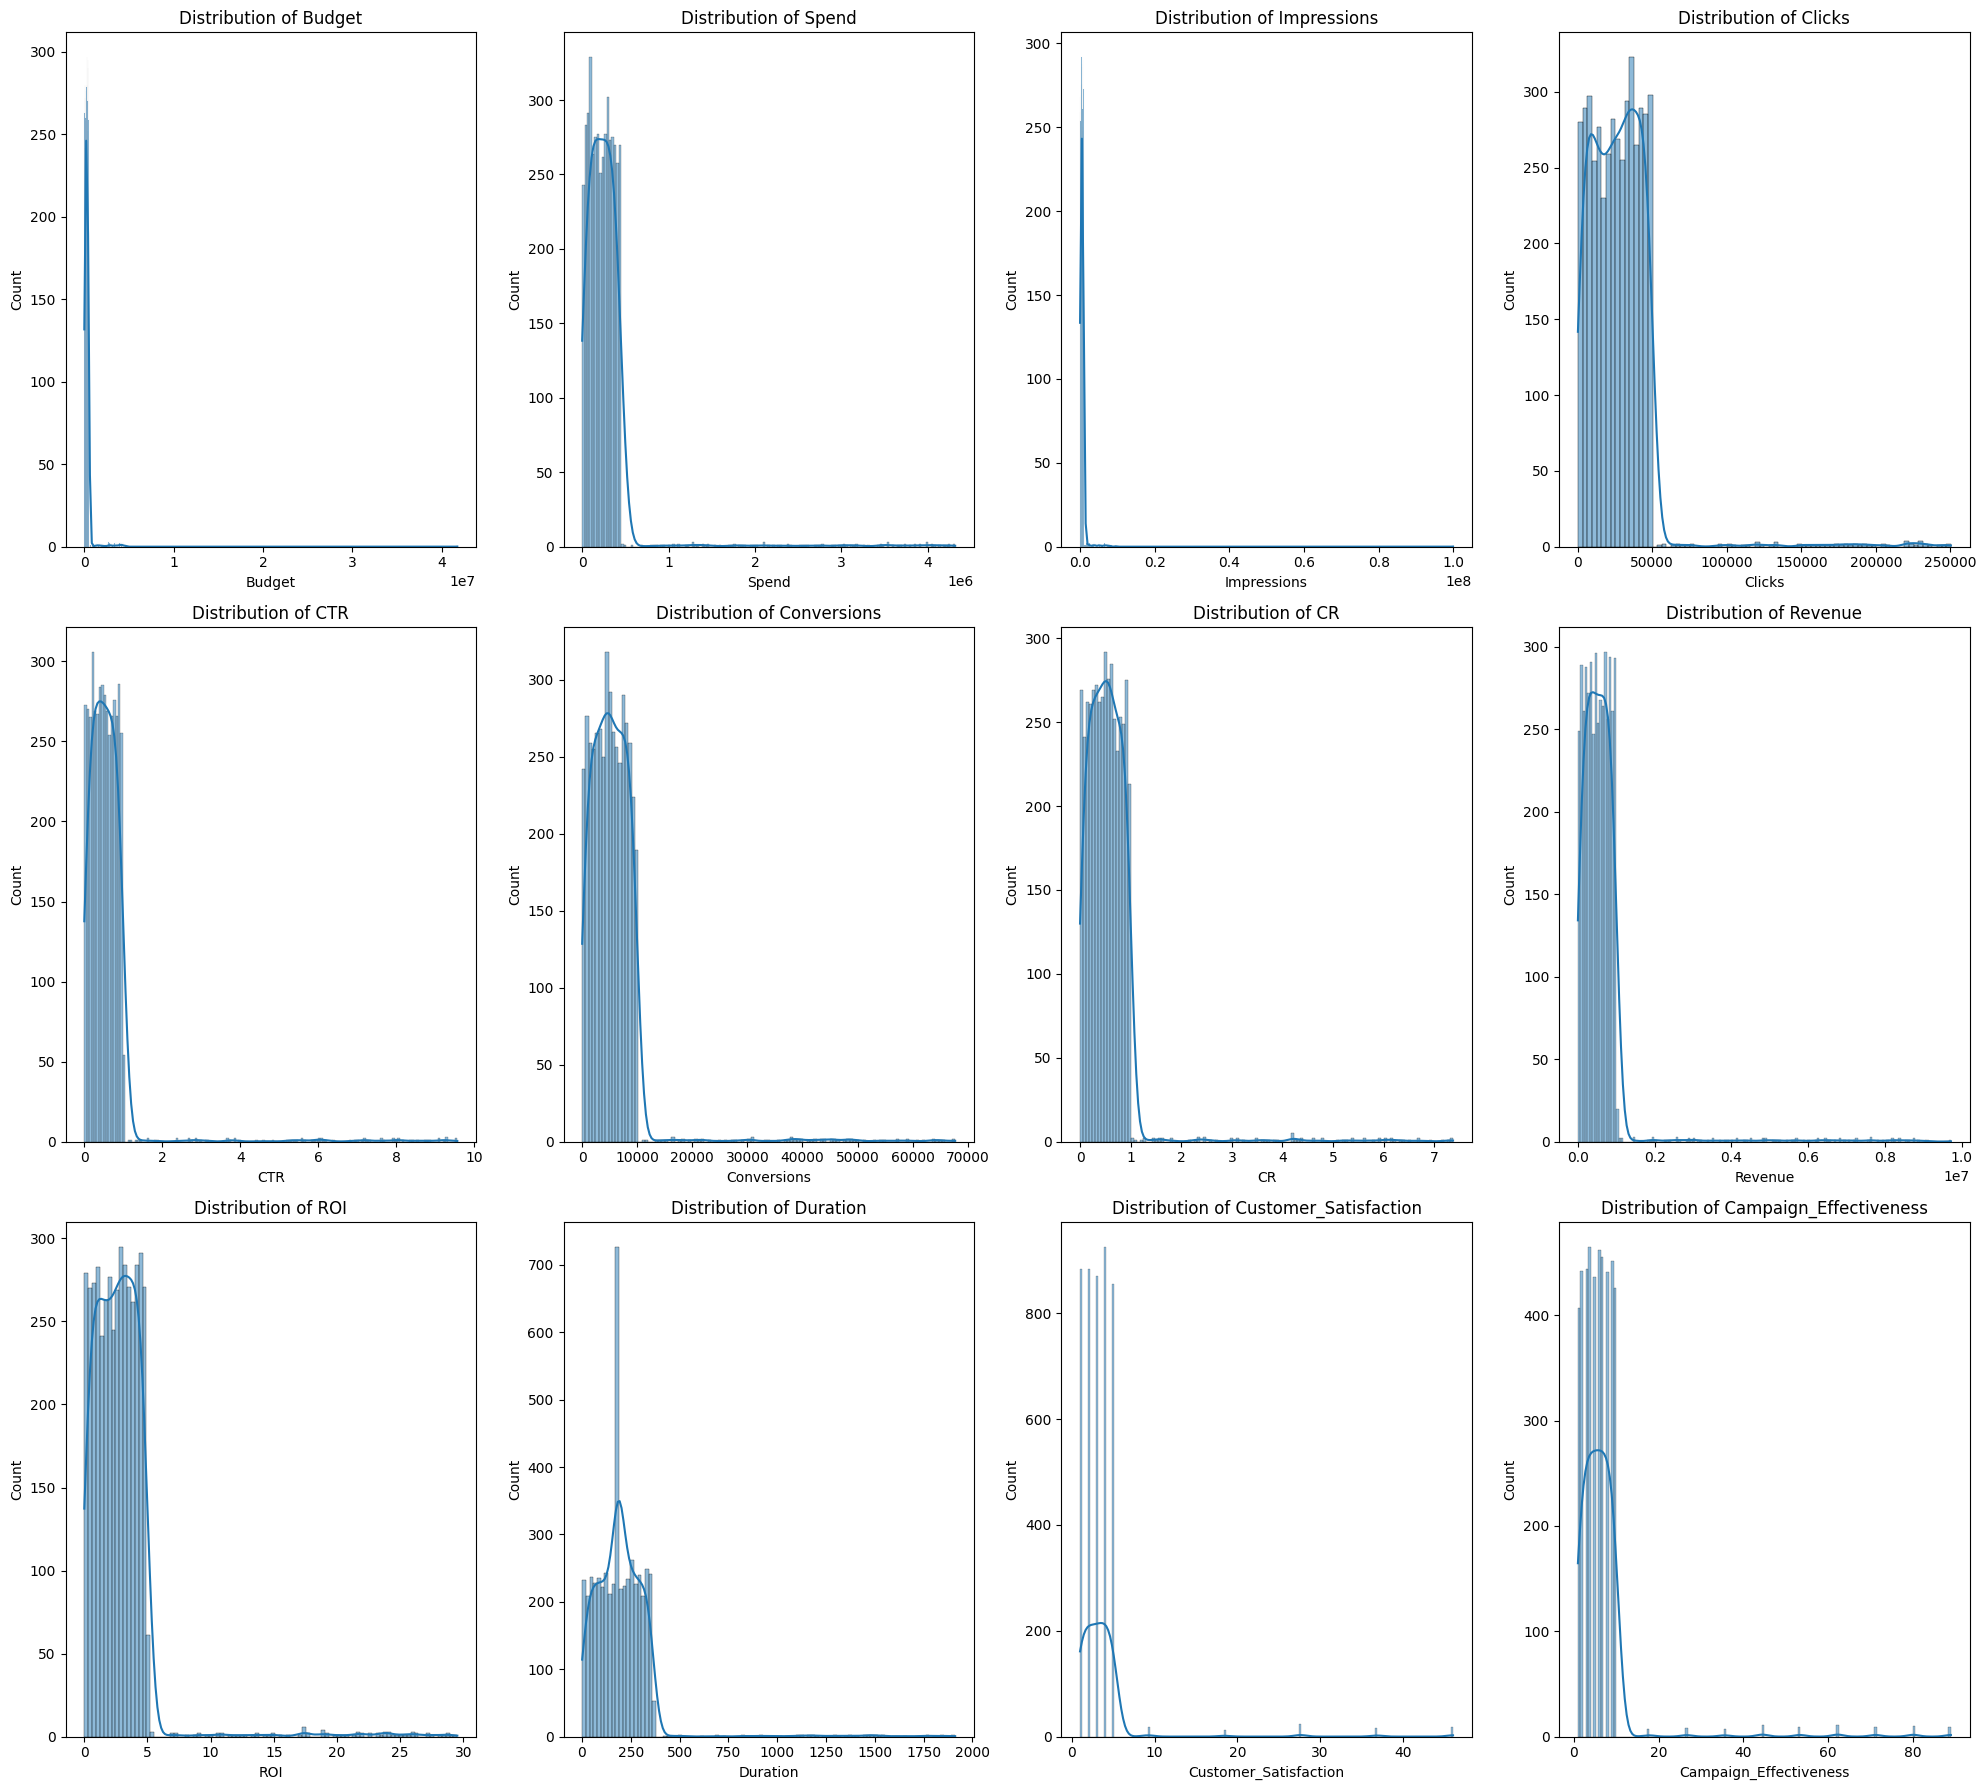

In [101]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 3) // 4  # Adjust the number of columns per row as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create separate histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


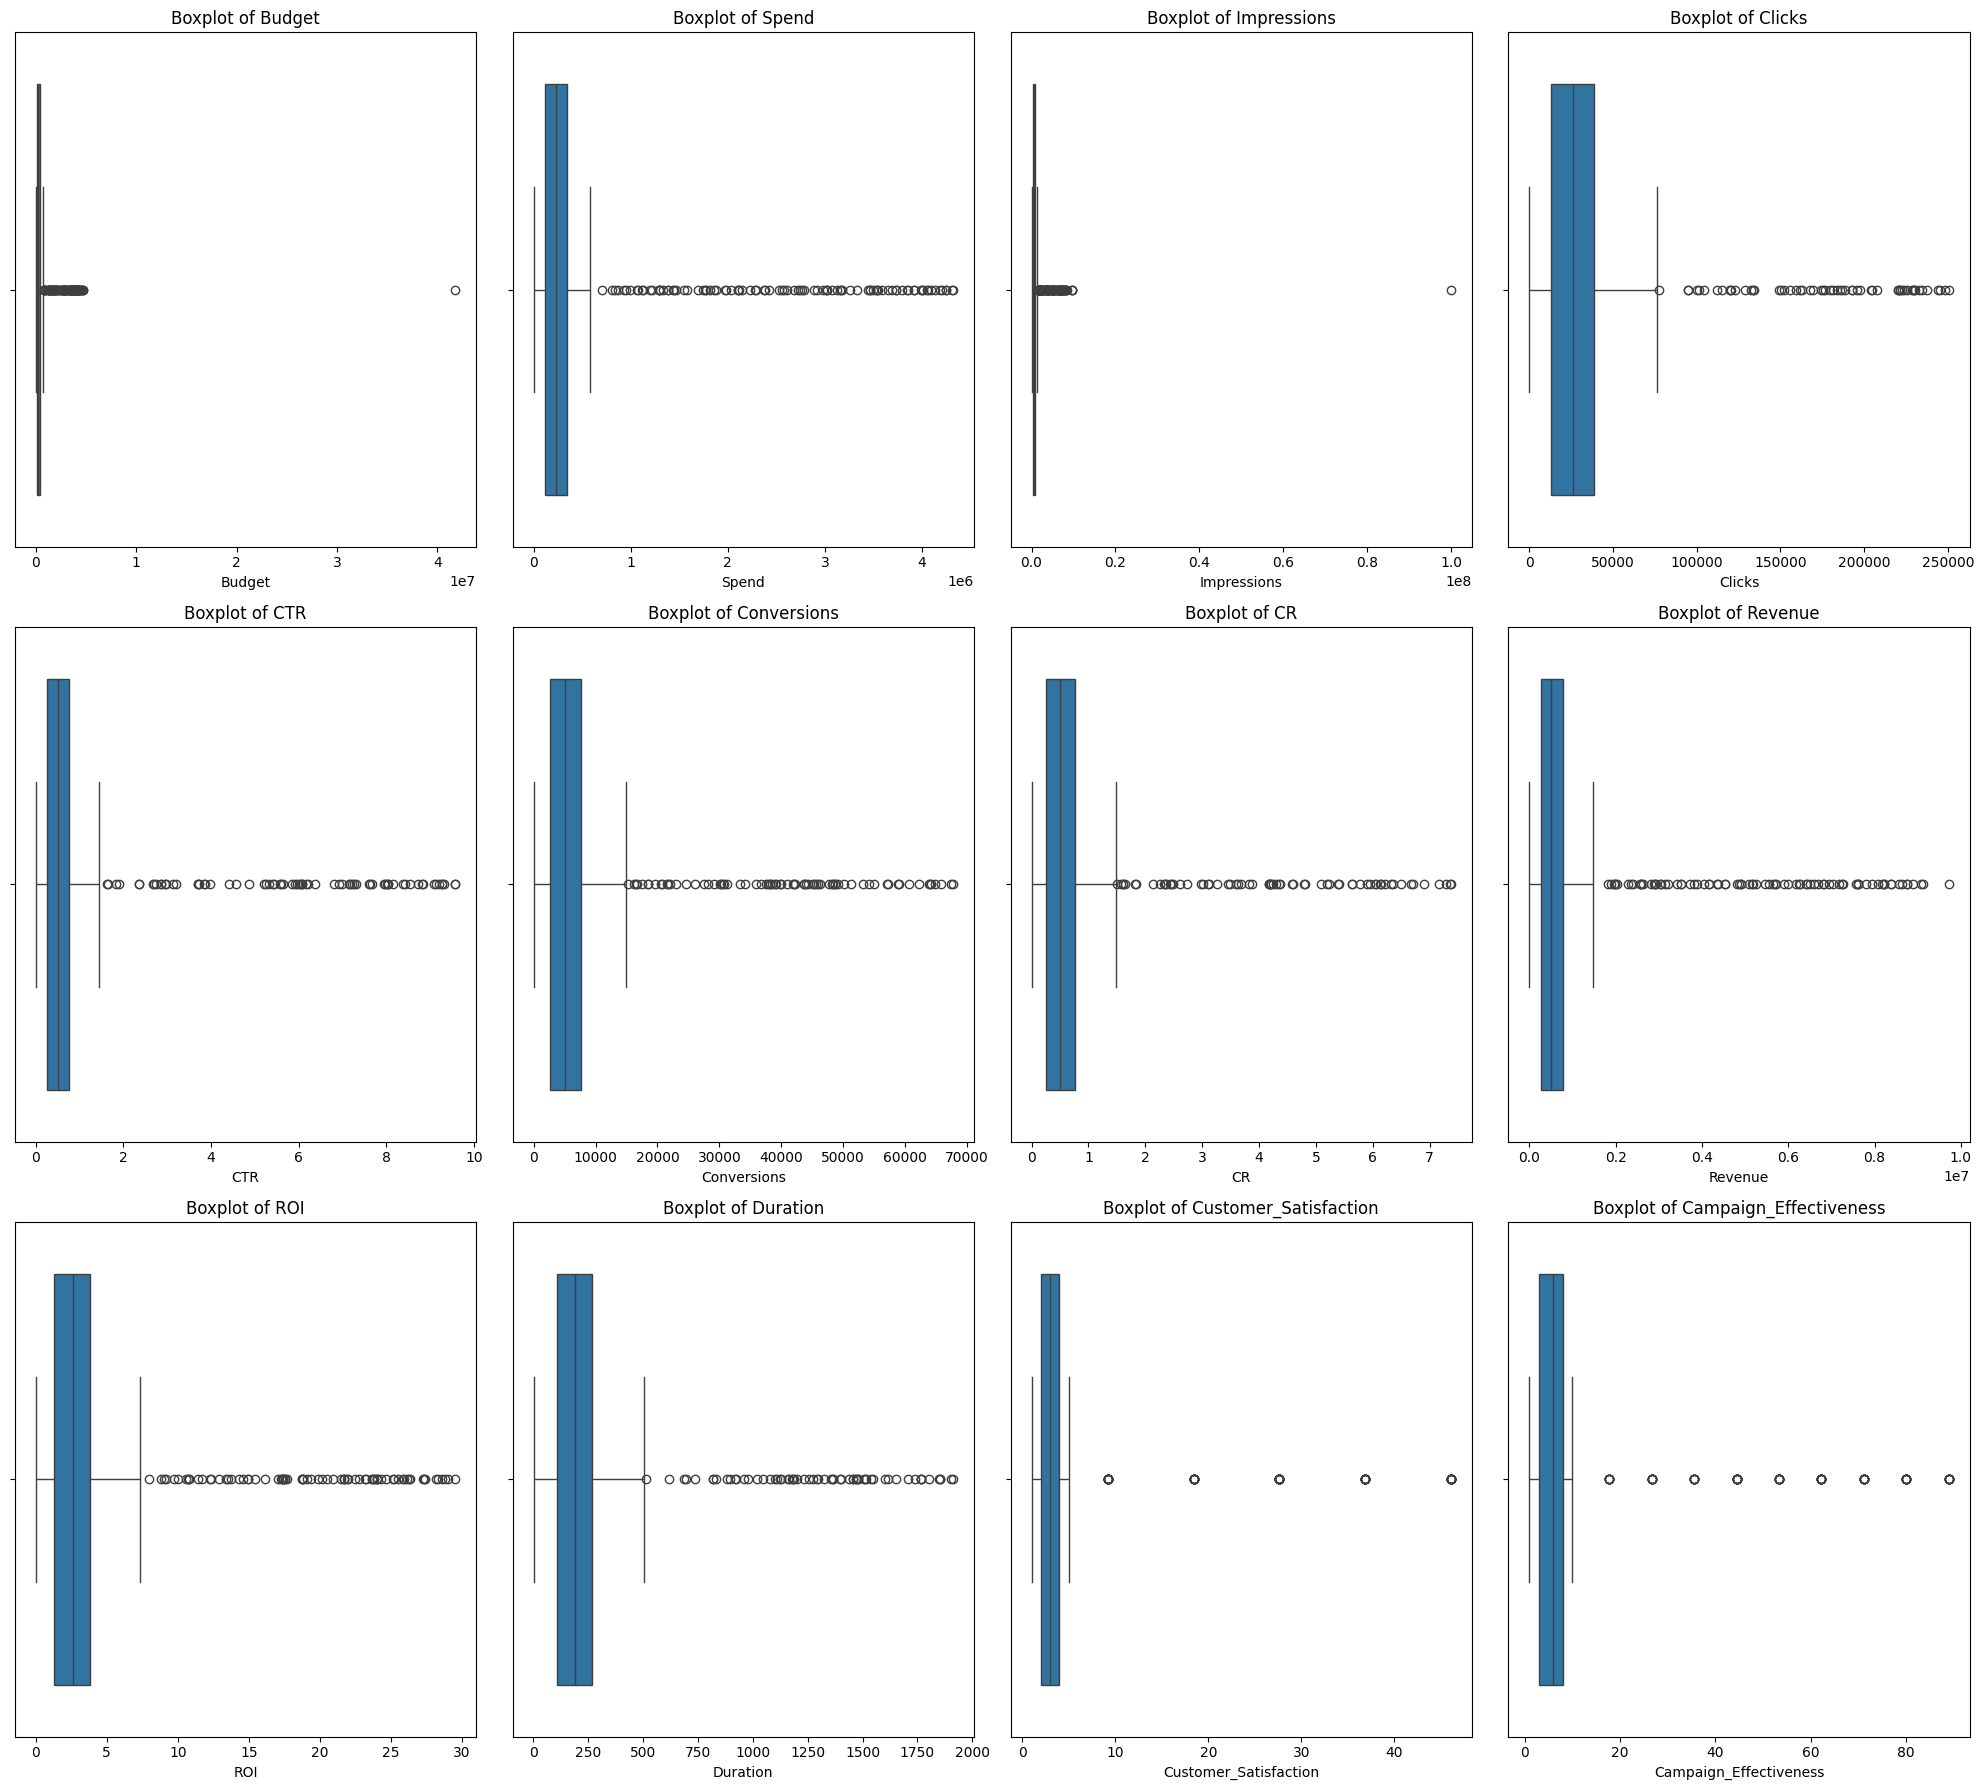

In [102]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for the subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 3) // 4 

# Create a figure and subplots
fig, axes = plt. subplots(nrows= num_rows, ncols=4, figsize=(20, 6 * num_rows))

# Create separate box plots for each numerical column
for i, column in enumerate (numerical_columns):
    row = i // 4
    col = i % 4
    sns.boxplot (x=df[column], ax=axes [row, col])
    axes [row, col].set_title(f'Boxplot of {column}')

# Remove any unused subplots
for j in range(i + 1, num_rows * 4):
    fig.delaxes (axes. flatten()[j])

plt.tight_layout()
plt.show()


After analyzing the histograms and boxplots, we've decided to fill the empty cells with the median. Because some of the outliers are too extreme, we'll use the median to fill the null values, as the median is typically more robust than using the mean for cases like this.

In [103]:
#we create a code to fill empty values in the numerical columns with their corresponding meadian value
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [120]:
#We've successfully filled the missing values in the numerical columns with the median value.
isnull = df.isnull().sum()
isnull

Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
Log_Budget                0
Budget_Category           0
dtype: int64

#### 4.2 Handling the outliers

Now that we've fixed the missing values, we can use a code designed to identify and count outliers in the numerical columns of a DataFrame. For this, we'll use the IQR (interquartile range), a measure of statistical dispersion used to define the bounds for identifying outliers.

In [105]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]  # Number of outliers in this column

# Display the count of outliers for each column
outliers_count


{'Budget': 92,
 'Spend': 97,
 'Impressions': 89,
 'Clicks': 61,
 'CTR': 74,
 'Conversions': 76,
 'CR': 69,
 'Revenue': 87,
 'ROI': 81,
 'Duration': 64,
 'Customer_Satisfaction': 89,
 'Campaign_Effectiveness': 81}

In [106]:
df['Budget'].describe().round(2)

count        5000.00
mean       314303.40
std        712747.14
min         10014.00
25%        152384.00
50%        265945.00
75%        372441.00
max      41756100.00
Name: Budget, dtype: float64

We've decided to keep the outliers and instead divide the Budget into 4 categories, Low Budget, Medium Low Budget, Medium Budget and High Budget. This will allow us to analyze the data based on how much money each campaign had. We'll first apply a log transformation to the budget. The log transformation is often used to normalize data that spans several orders of magnitude, making it easier to analyze and visualize.

In [334]:
# Apply the log transformation to the Budget column and create a new column called Log_Budget.
df['Log_Budget']= np.log1p(df['Budget'])

# Classify the Budget column into four categories based on the log transformation values.
df['Budget_Category'] = pd.qcut(
    df['Log_Budget'], 
    q=4,
    labels=['Low Budget','Medium Low Budget', 'Medium Budget', 'High Budget']
)
# Verify the changes
print(df[['Budget', 'Budget_Category']])
print("\nCategory distribution:")
print(df['Budget_Category'].value_counts())

        Budget    Budget_Category
0     484341.0        High Budget
1     468792.0        High Budget
2      10487.0         Low Budget
3     345431.0      Medium Budget
4     322345.0      Medium Budget
...        ...                ...
4995  373204.0        High Budget
4996   81357.0         Low Budget
4997  216060.0  Medium Low Budget
4998  120531.0         Low Budget
4999  476378.0        High Budget

[5000 rows x 2 columns]

Category distribution:
Budget_Category
Medium Low Budget    1500
Low Budget           1250
High Budget          1250
Medium Budget        1000
Name: count, dtype: int64


In [335]:
#We have created two new columns, Log_Budget and Budget_Category, based on the Budget column.
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,...,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment,Log_Budget,Budget_Category
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,26232.0,0.07850,7993.0,...,849005.0,0.64,212.0,2023-03-02,2023-12-23,3.0,3.0,Medium,13.090547,High Budget
1,CAM0002,Billboard,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.94790,9459.0,...,921078.0,3.78,29.0,2023-07-21,2023-07-07,3.0,7.0,Medium,13.057917,High Budget
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,0.50015,7168.0,...,51142.0,3.64,74.0,2023-04-12,2023-10-20,1.0,2.0,Medium,9.257987,Low Budget
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.61570,7190.0,...,191887.0,2.64,67.0,2023-04-24,2023-01-26,5.0,6.0,High,12.752551,Medium Budget
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,0.50015,1794.0,...,167241.0,1.02,40.0,2023-01-10,2023-01-01,5.0,6.0,Low,12.683381,Medium Budget


#### Check correlation between columns

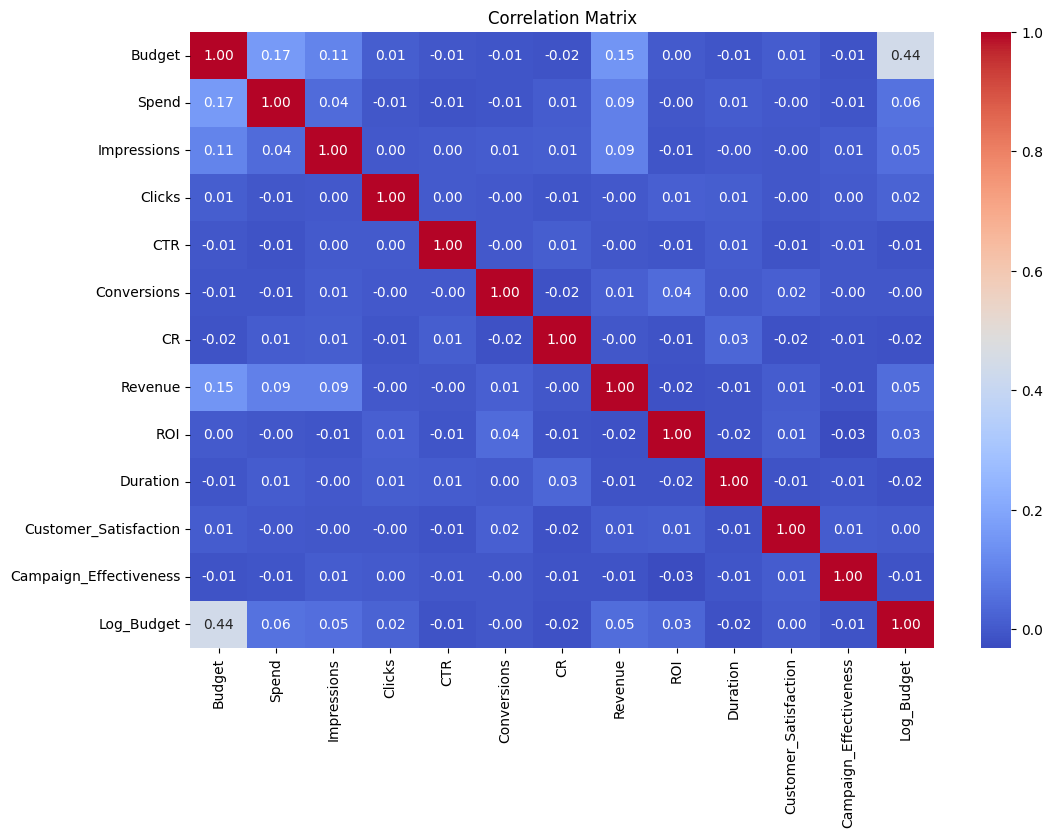

In [109]:
#We can creat a heatmap to visualize the correlation between the columns in the data.

# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Step 5 - EXPLORATORY DATA ANALYSIS

#### 5.1 Univariate analysis

#### Distribution of numerical variables

We'll check the distribution of the numerical variables using histograms and KDE plots. We see that the distribution is asymmetrical. 

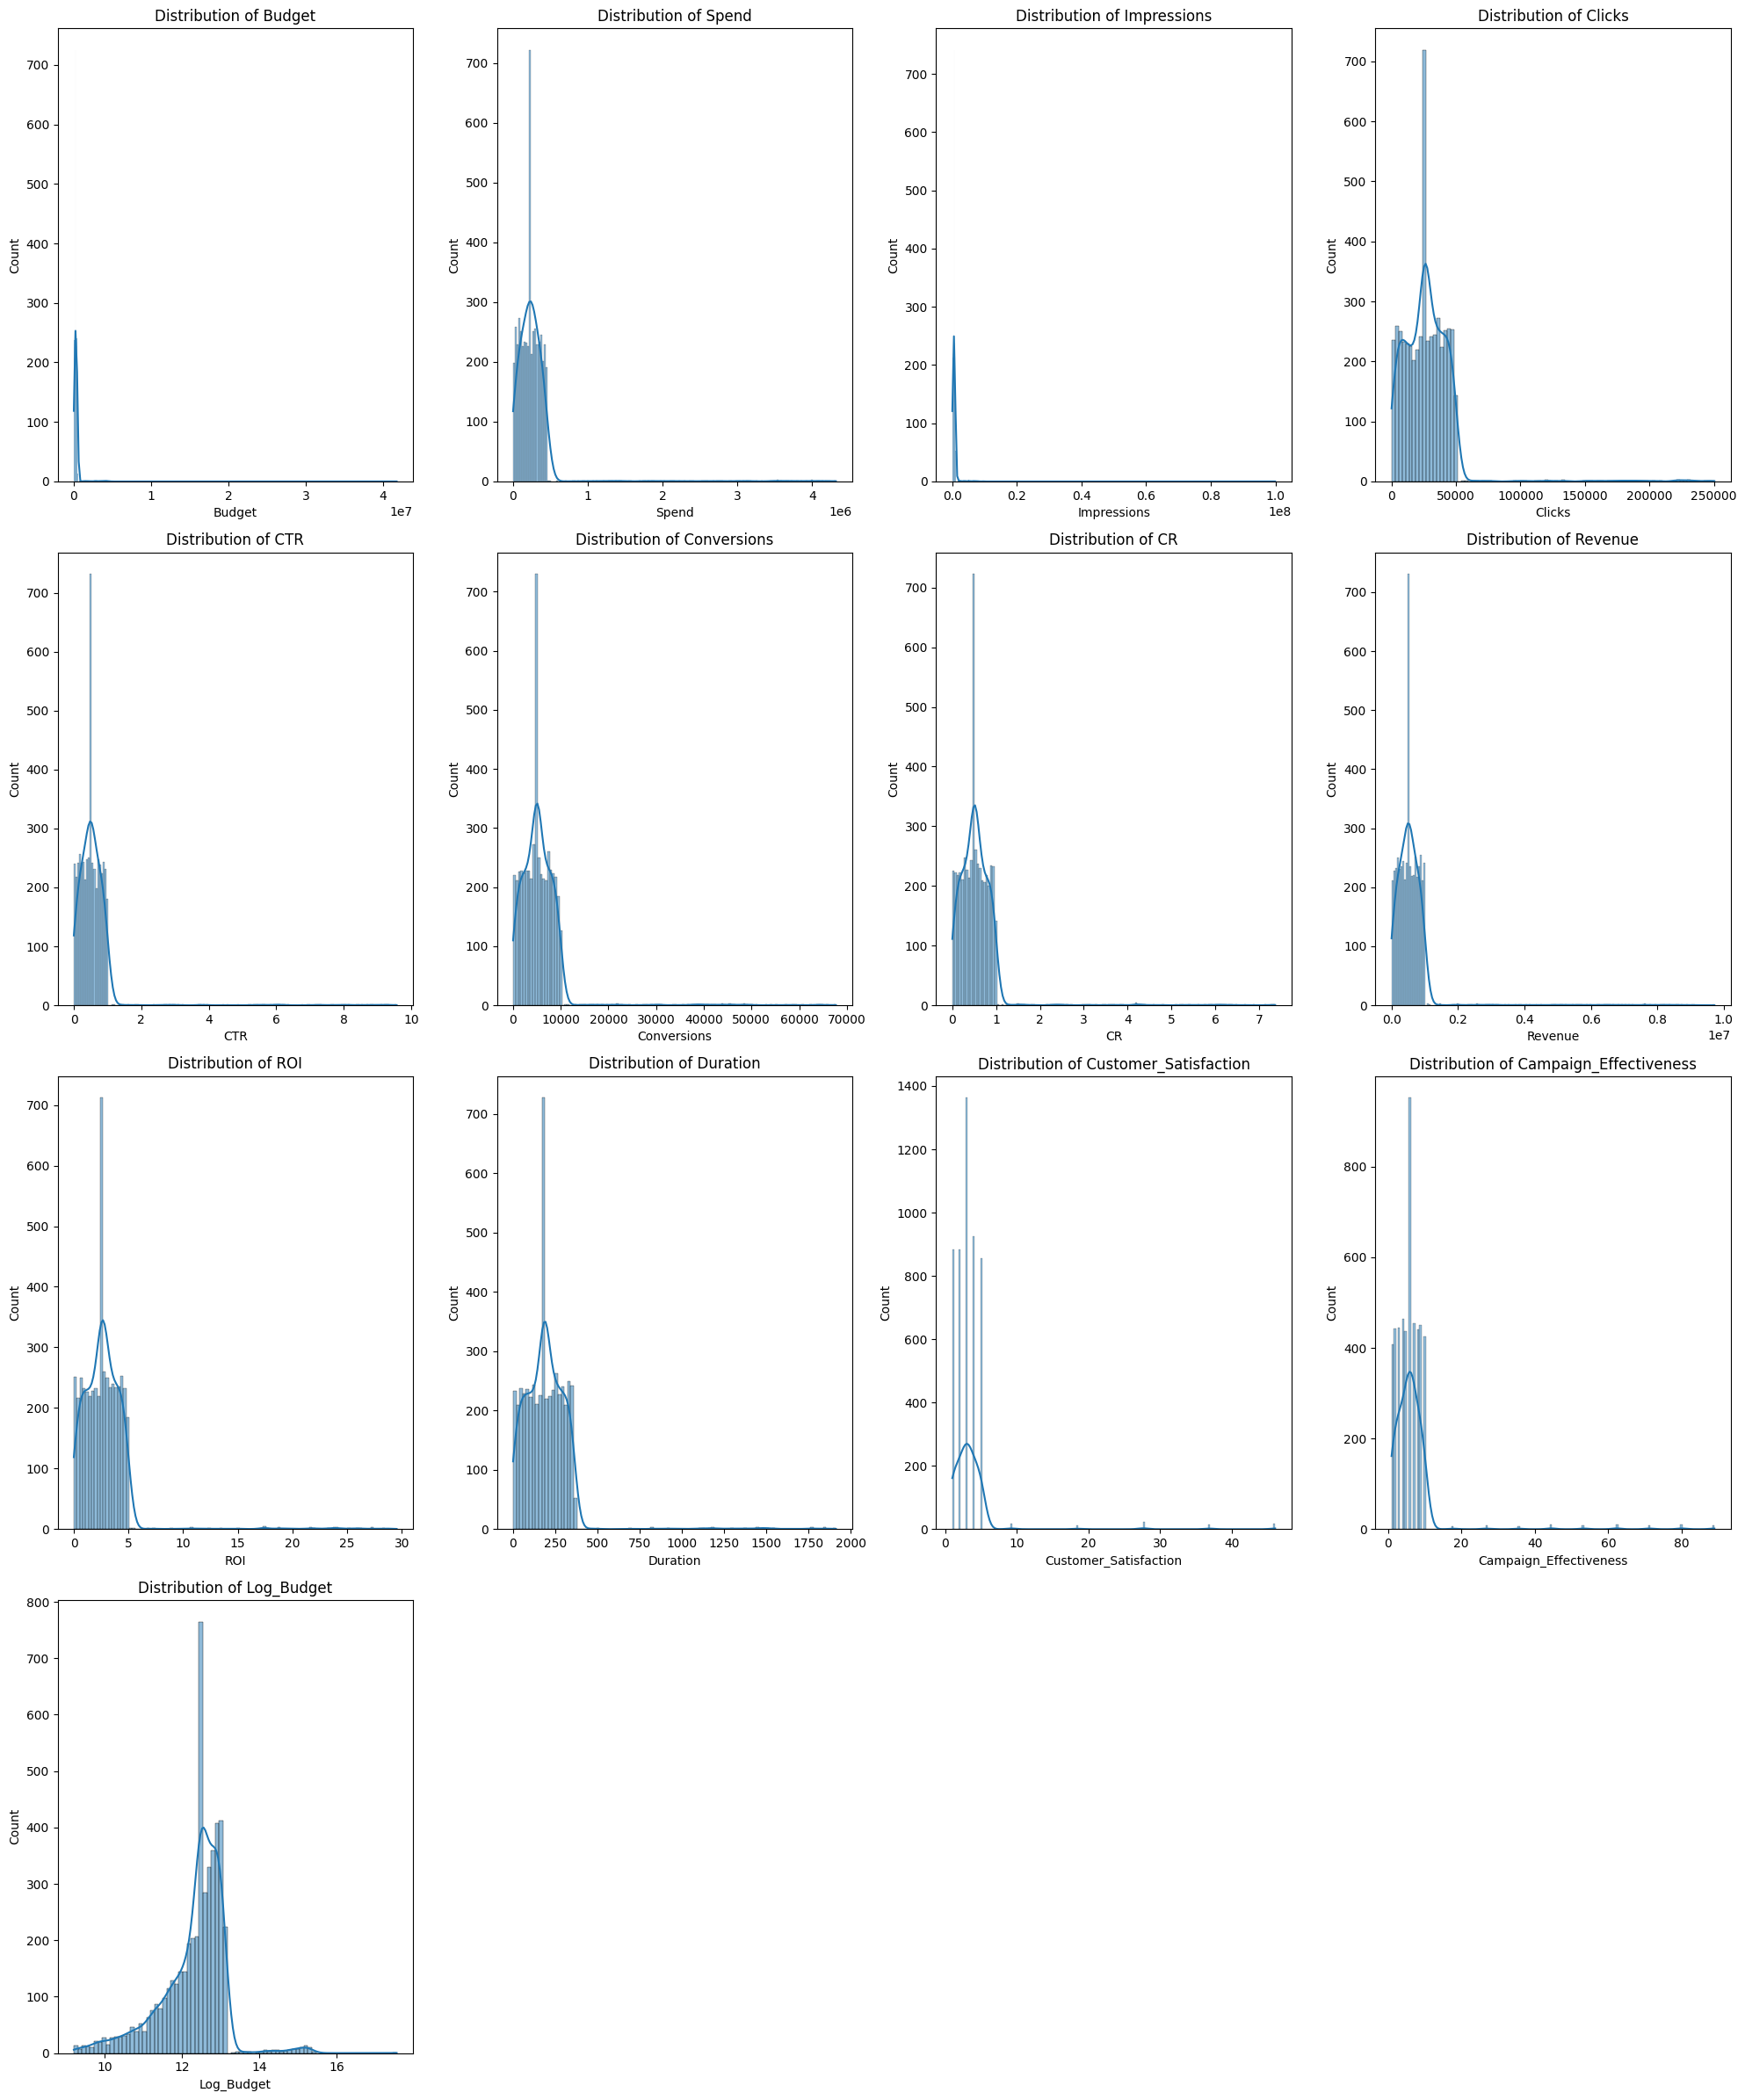

In [110]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for the subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 3) // 4  # Adjust the number of columns per row as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create separate histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Frequency of categorical variables

We'll check the frequency of the values in the categorical columns.

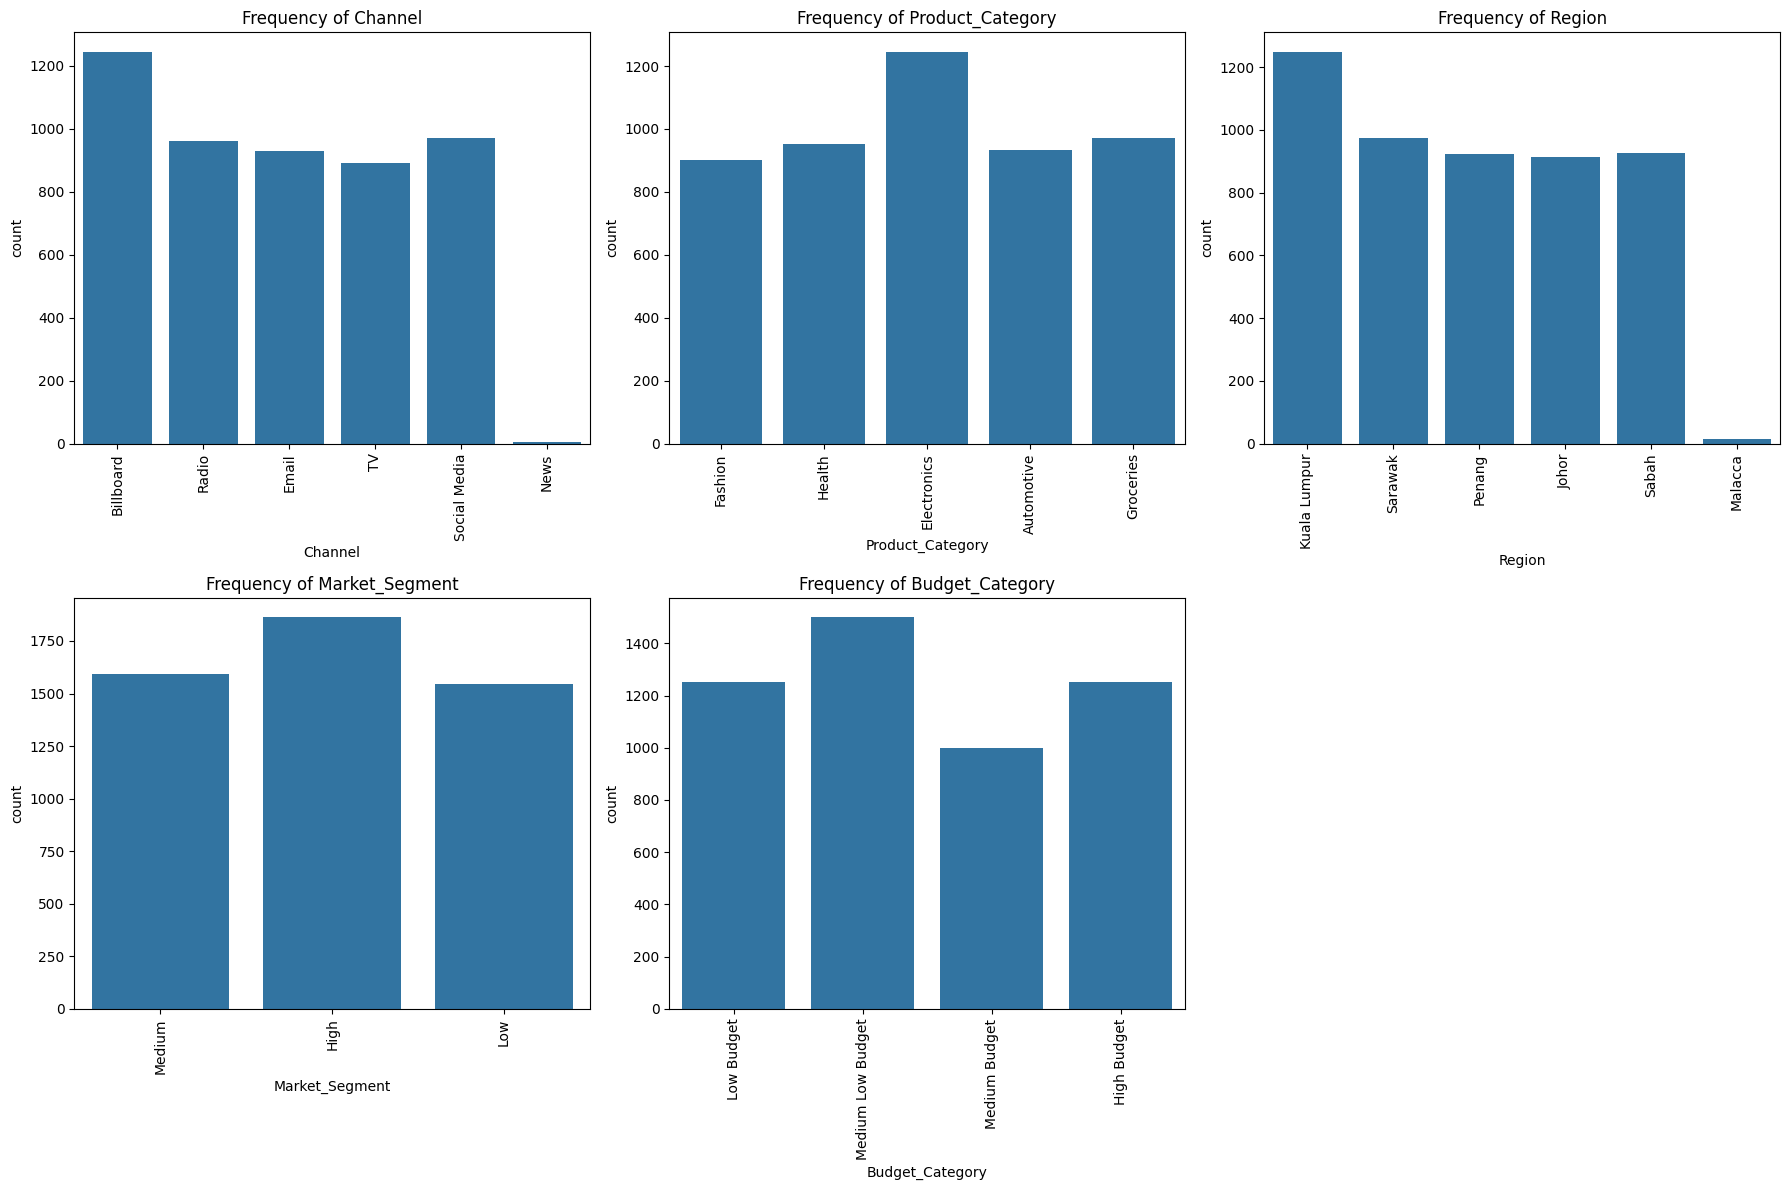

In [111]:
# Select the categorical columns excluding 'Campaign_ID'. We exclude 'Campaign_ID' because it is unique for each row and doesn't provide useful information for this analysis.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns[categorical_columns != 'Campaign_ID']
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))

# Create separate count plots for each categorical column
for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    sns.countplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Frequency of {column}')
    axes[row, col].tick_params(axis='x', rotation=90)

# Eliminate any unused subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

#### 5.2 Bivariate analysis

It is one form of statistical analysis, used to find out if there is a relationship between two variables.

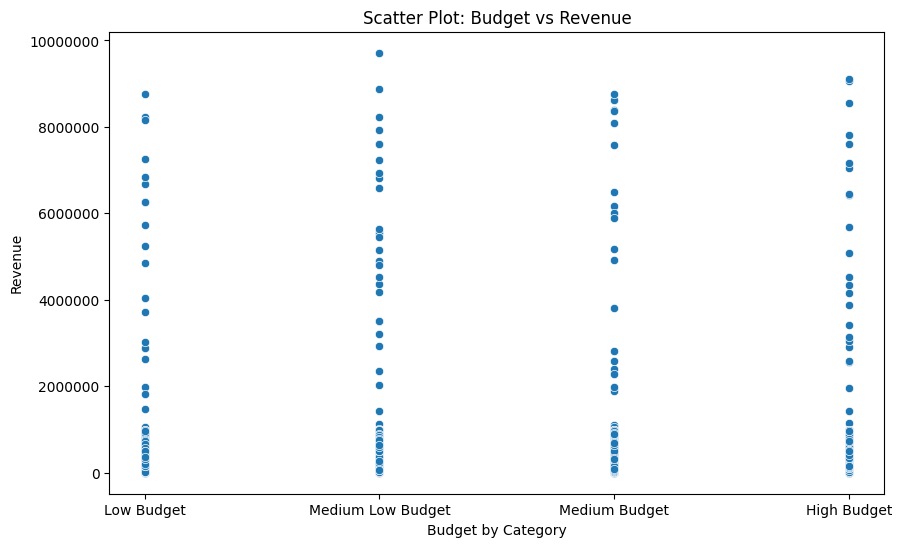

In [226]:
# From the correlation heatmap, we can see that the 'Budget' column has a small positive correlation with the 'Revenue' column.
# We can visualize this relationship using a scatter plot.
# Budget VS Revenue analysis (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget_Category',y='Revenue', data=df.round({'Revenue':2}))
plt.title('Scatter Plot: Budget vs Revenue')
plt.xlabel('Budget by Category')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain',axis='y') # Disable scientific notation
plt.show()

#### 5.3 Multivariate analysis

This type of analysis involves multiple variables (more than two) to identify any possible association among them.

In [122]:
#check correlation between main numerical columns
correlation_matrix2 = df[['Budget', 'Spend', 'Impressions', 'Clicks', 'Revenue', 'ROI']].corr()
correlation_matrix2

,Budget,Spend,Impressions,Clicks,Revenue,ROI
Budget,1.000000,0.165144,0.105258,0.009504,0.146088,0.002208
Spend,0.165144,1.000000,0.043333,-0.005479,0.093784,-0.004666
Impressions,0.105258,0.043333,1.000000,0.000527,0.093793,-0.008174
Clicks,0.009504,-0.005479,0.000527,1.000000,-0.002989,0.013561
Revenue,0.146088,0.093784,0.093793,-0.002989,1.000000,-0.017038
ROI,0.002208,-0.004666,-0.008174,0.013561,-0.017038,1.000000


<Axes: >

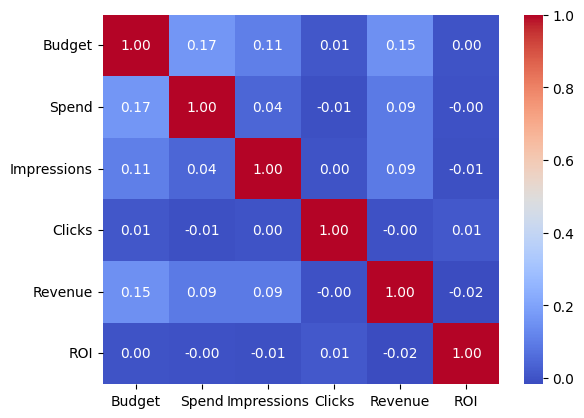

In [114]:
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')

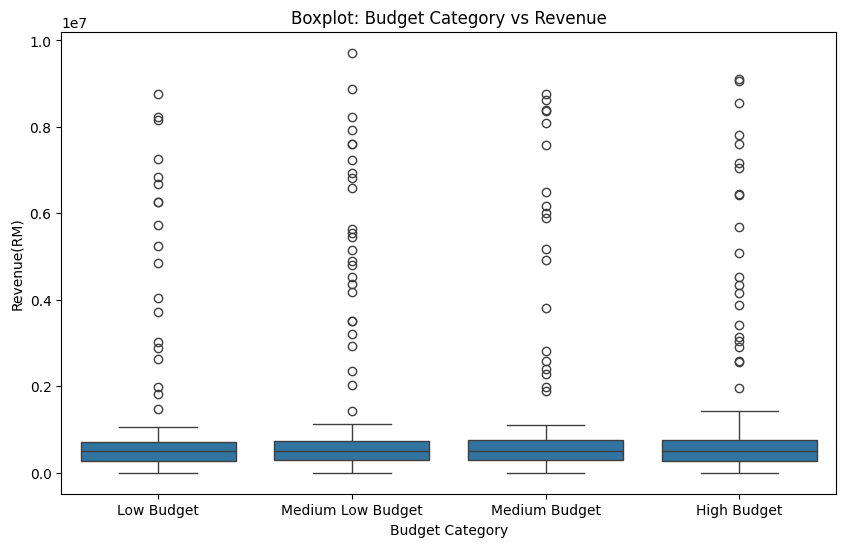

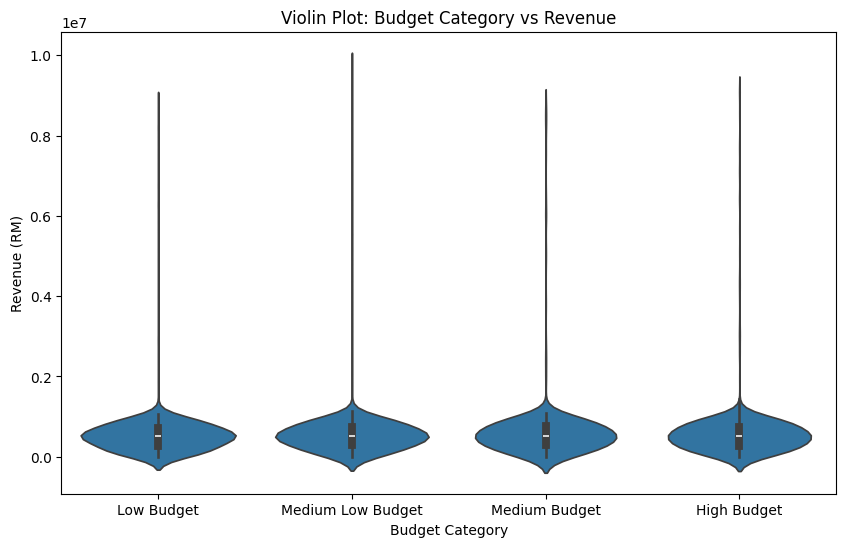

Market_Segment  High  Low  Medium
Channel                          
Billboard        463  386     395
Email            340  296     292
News               3    0       3
Radio            365  286     309
Social Media     372  296     302
TV               320  281     291


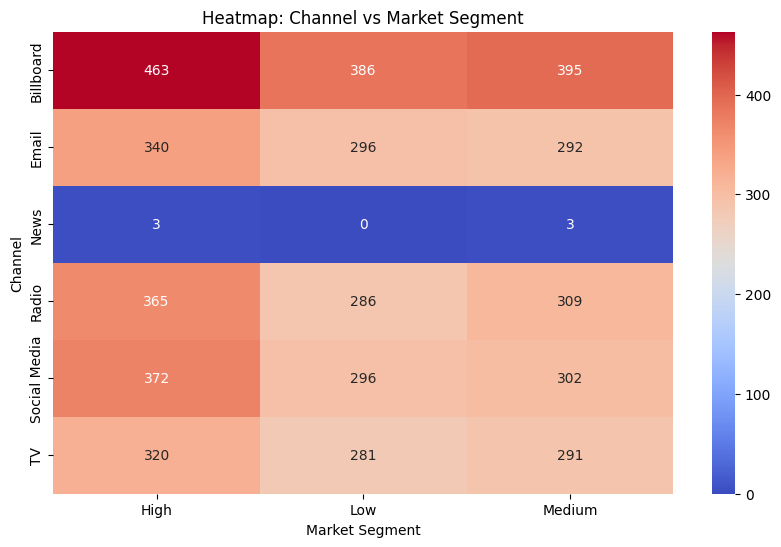

In [115]:
# Create a boxplot for Budget_Category vs Revenue
plt.figure(figsize=(10,6))
sns.boxplot(x='Budget_Category',y='Revenue',data=df)
plt.title('Boxplot: Budget Category vs Revenue')
plt.xlabel('Budget Category')
plt.ylabel('Revenue(RM)')
plt.show()

# Create a violin plot for Budget_Category vs Revenue
plt.figure(figsize=(10, 6))
sns.violinplot(x='Budget_Category', y='Revenue', data=df)
plt.title('Violin Plot: Budget Category vs Revenue')
plt.xlabel('Budget Category')
plt.ylabel('Revenue (RM)')
plt.show()

# Contingency Table: Channel vs Market Segment
contingency_table = pd.crosstab(df['Channel'],df['Market_Segment'])
print(contingency_table)

# Heatmap: Channel vs Market Segment
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True,cmap='coolwarm',fmt='d')
plt.title('Heatmap: Channel vs Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Channel')
plt.show ()

We can check the outliers for the revenue column separated by region.

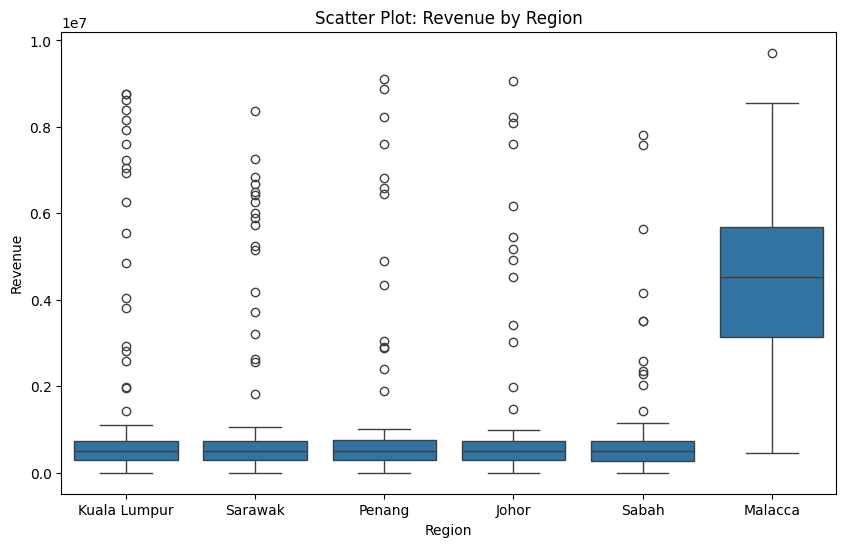

In [231]:
# Create a violin plot for Budget_Category vs Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Revenue', data=df)
plt.title('Scatter Plot: Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

Clustering is a powerful technique for discovering patterns and structures in data, and it can be applied to a wide range of problems and datasets. 

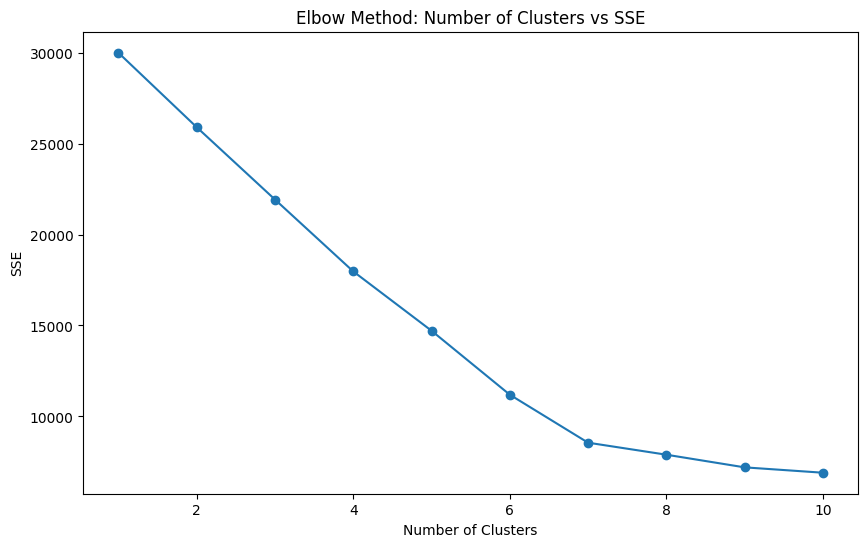

Silhouette Score for 7 clusters:  0.35


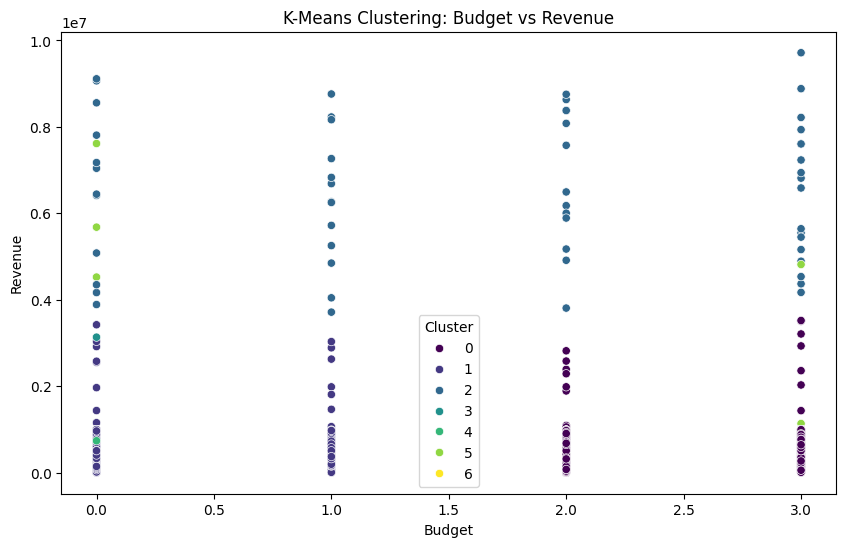

In [236]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Convert the Budget_Category column to numerical using Label Encoding
label_encoder = LabelEncoder ()
df['Budget_Category']=label_encoder.fit_transform(df['Budget_Category'])

# Select relevant columns for clustering
cluster_data = df[['Budget_Category', 'Spend', 'Impressions', 'Clicks', 'Revenue', 'ROI']].dropna()

# Standardize the data
scaler = StandardScaler ()
scaled_data = scaler.fit_transform(cluster_data)

# Use the Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans (n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot (range (1, 11),sse, marker='o')
plt.title('Elbow Method: Number of Clusters vs SSE')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Select the optimal number of clusters based on the Elbow Method
optimal_clusters = 7
kmeans = KMeans (n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the data
cluster_data['Cluster'] = clusters

# Calculate the Silhouette Score for the optimal number of clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print (f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg: .2f}')

# Visualizar la distribución de los clusters usando un par de variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_data['Budget_Category'], y=cluster_data['Revenue'],hue=cluster_data['Cluster'],palette='viridis')
plt.title('K-Means Clustering: Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Step 6 - DATA VISUALIZATION

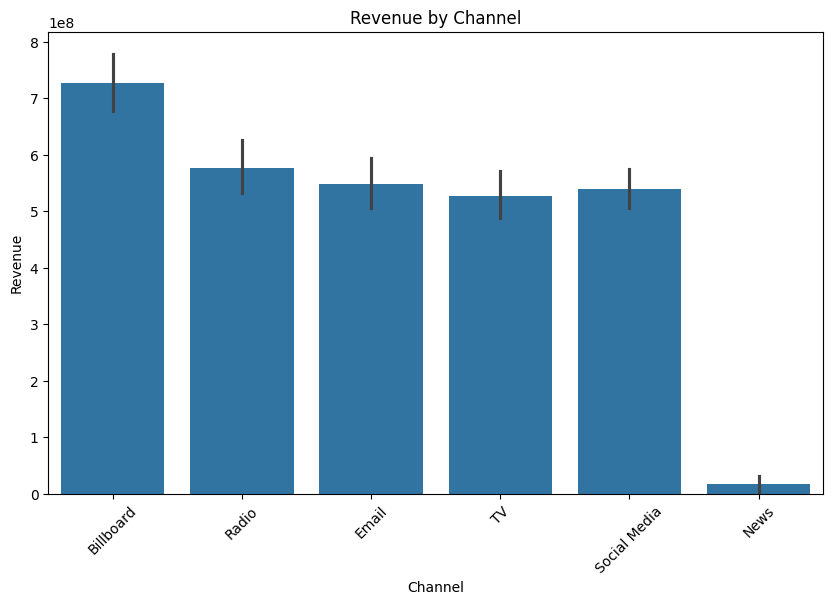

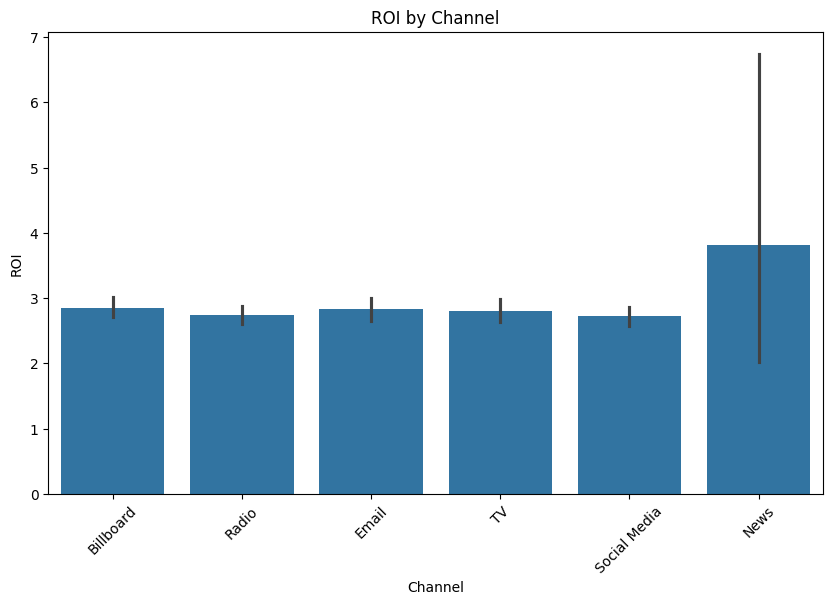

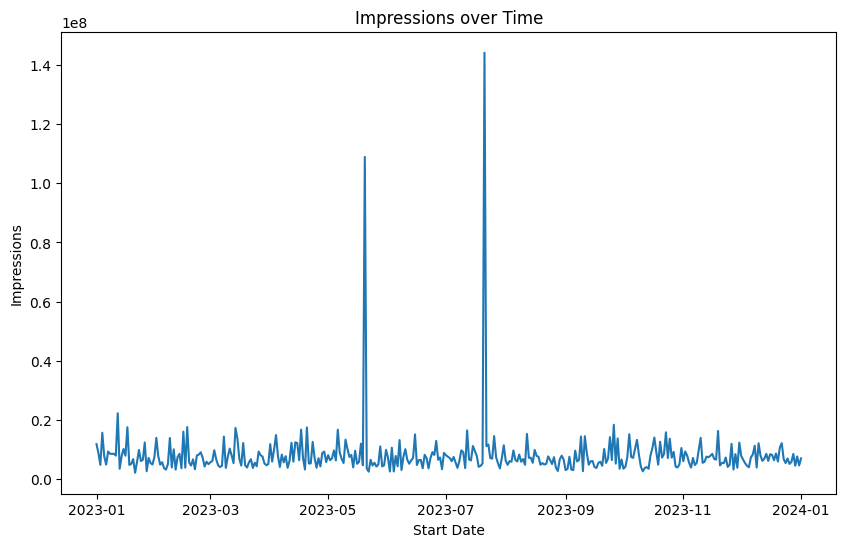

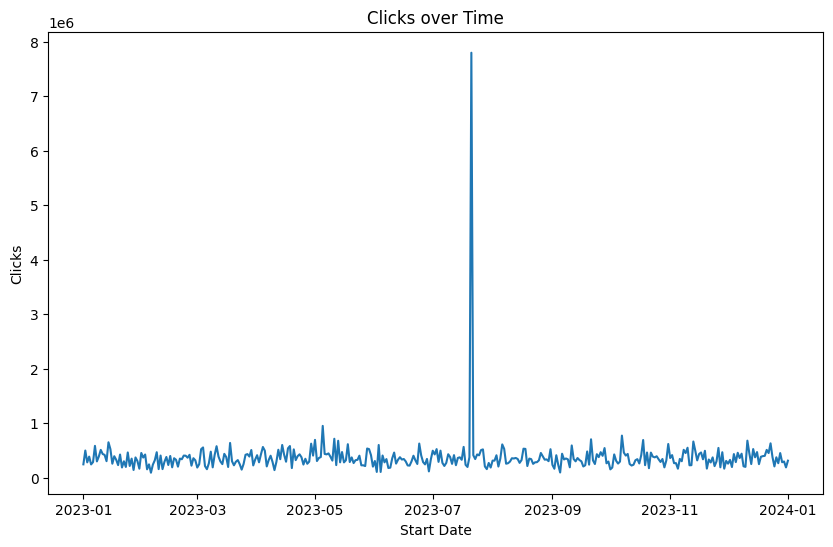

In [345]:
# Bar plot: Revenue by Channel
plt.figure(figsize=(10, 6))
sns.barplot (x='Channel', y= 'Revenue', data=df, estimator=sum)
plt.title('Revenue by Channel')
plt.xlabel('Channel')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show ()

# Bar plot: Spend by Channel
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel',y='ROI',data=df, estimator=np.mean)
plt.title('ROI by Channel')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

# Temporal series analysis: Impressions over time
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y')
impressions_time_series = df.groupby('Start_Date')['Impressions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Impressions', data=impressions_time_series)
plt.title('Impressions over Time')
plt.xlabel('Start Date')
plt.ylabel ('Impressions')
plt.show()

# Temporal series analysis: Clicks over time
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y')
clicks_time_series = df.groupby('Start_Date')['Clicks'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Clicks', data=clicks_time_series)
plt.title('Clicks over Time')
plt.xlabel('Start Date')
plt.ylabel ('Clicks')
plt.show()

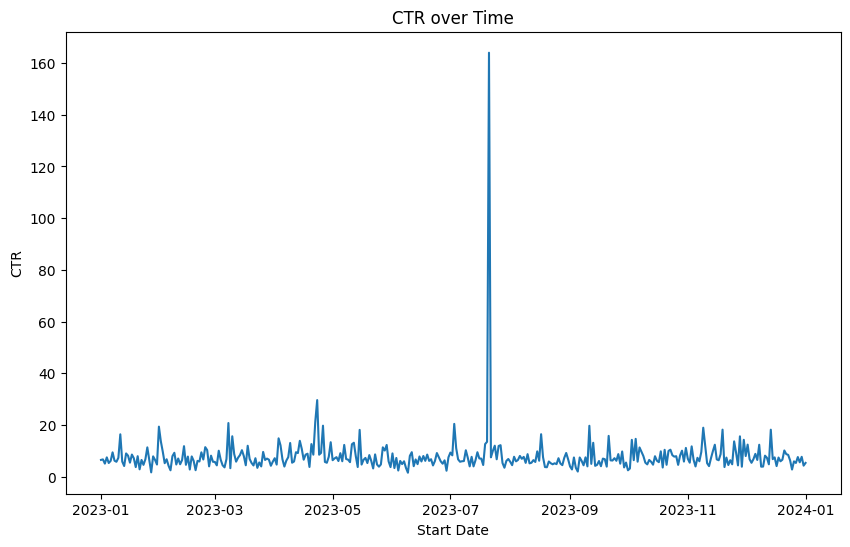

In [363]:
# Temporal series analysis: CTR over time
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y')
ctr_time_series = df.groupby('Start_Date')['CTR'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='CTR', data=ctr_time_series)
plt.title('CTR over Time')
plt.xlabel('Start Date')
plt.ylabel ('CTR')
plt.show()

Analyzing the budget, spend and revenue.

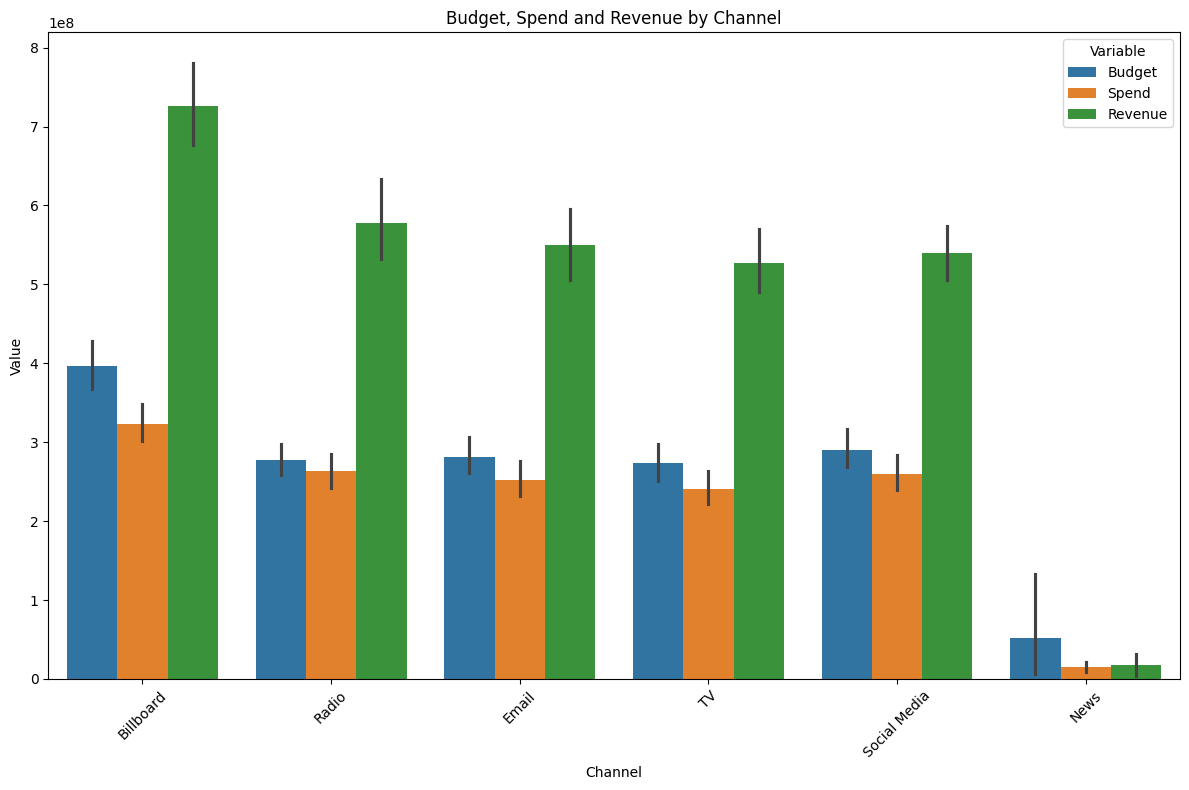

In [346]:
# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='Channel', value_vars=['Budget', 'Spend', 'Revenue'],
                  var_name='Variable', value_name='Value')

# Create a single bar plot with hue for different variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Channel', y='Value', hue='Variable', data=df_long, estimator=sum)

# Customize plot
plt.title('Budget, Spend and Revenue by Channel')
plt.xlabel('Channel')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variable')

plt.tight_layout()
plt.show()

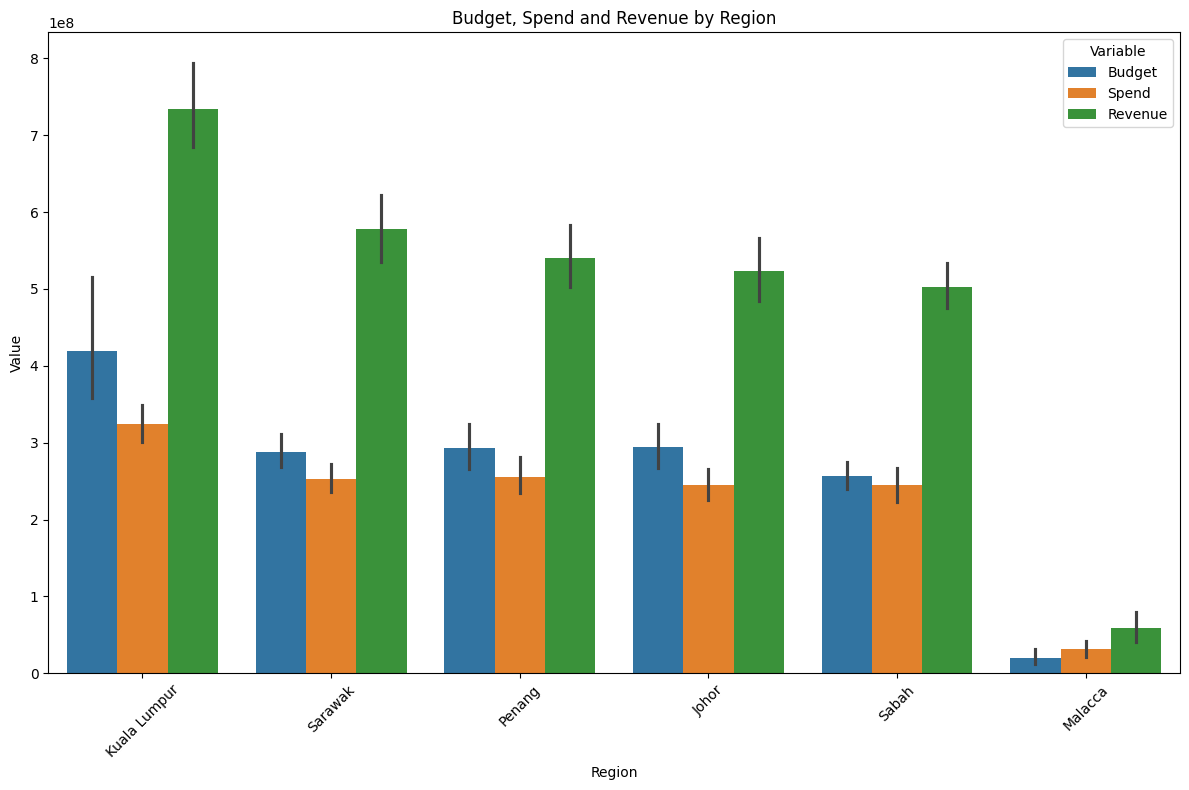

In [347]:
"""# Bar plot: Budget by Region
plt.figure(figsize=(10, 6))
sns.barplot (x='Region', y= 'Budget', data=df, estimator=sum)
plt.title('Budget by Region')
plt.xlabel('Region')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.show ()

# Bar plot: ROI by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region',y='ROI',data=df,estimator=np.mean)
plt.title('ROI by Region')
plt.xlabel('Region')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

# Bar plot: Spend by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region',y='Spend',data=df,estimator=np.mean)
plt.title('Spend by Region')
plt.xlabel('Region')
plt.ylabel('Spend')
plt.xticks(rotation=45)
plt.show()"""

# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='Region', value_vars=['Budget', 'Spend', 'Revenue'],
                  var_name='Variable', value_name='Value')

# Create a single bar plot with hue for different variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Value', hue='Variable', data=df_long, estimator=sum)

# Customize plot
plt.title('Budget, Spend and Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variable')

plt.tight_layout()
plt.show()

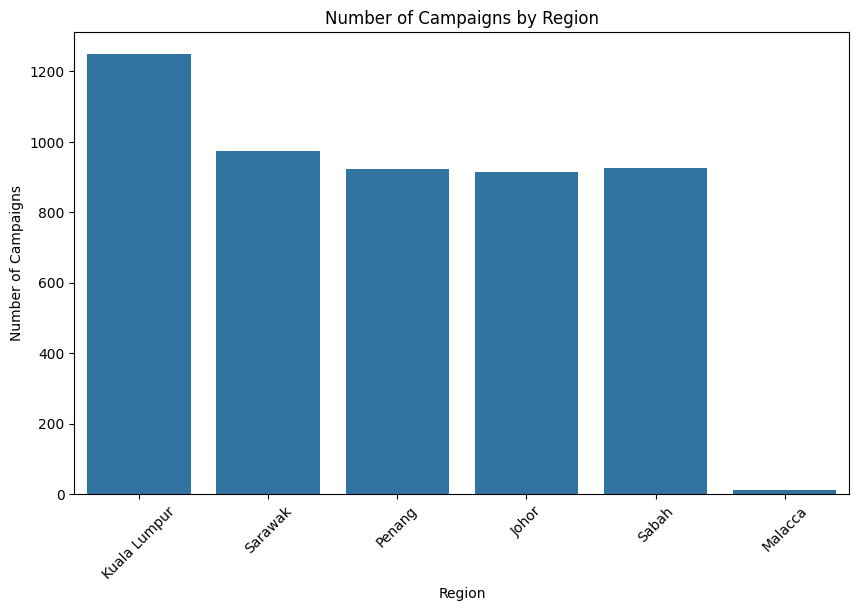

In [348]:
#show me the number of campaigns by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Number of Campaigns by Region')
plt.xlabel('Region')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.show()


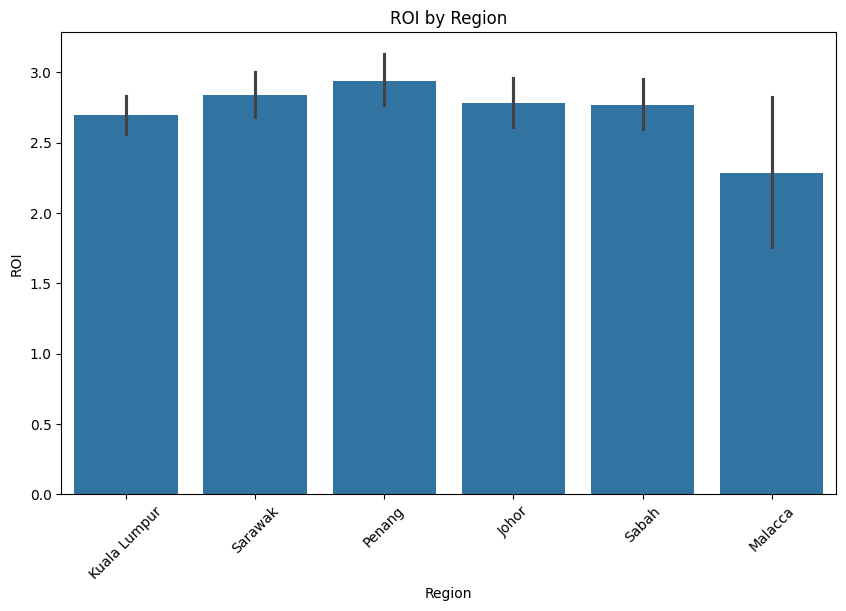

In [349]:
# Bar plot: ROI by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region',y='ROI',data=df,estimator=np.mean)
plt.title('ROI by Region')
plt.xlabel('Region')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

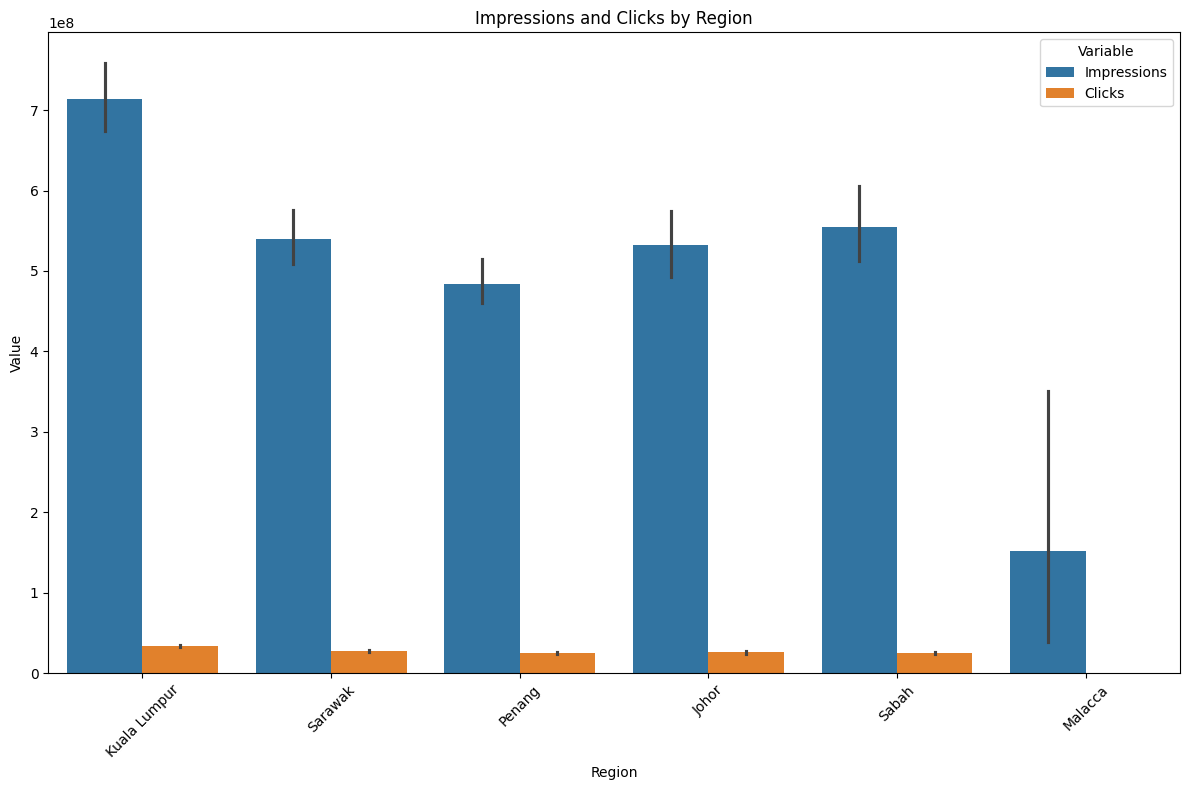

In [319]:
# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='Region', value_vars=['Impressions', 'Clicks'],
                  var_name='Variable', value_name='Value')

# Create a single bar plot with hue for different variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Value', hue='Variable', data=df_long, estimator=sum)

# Customize plot
plt.title('Impressions and Clicks by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variable')

plt.tight_layout()
plt.show()

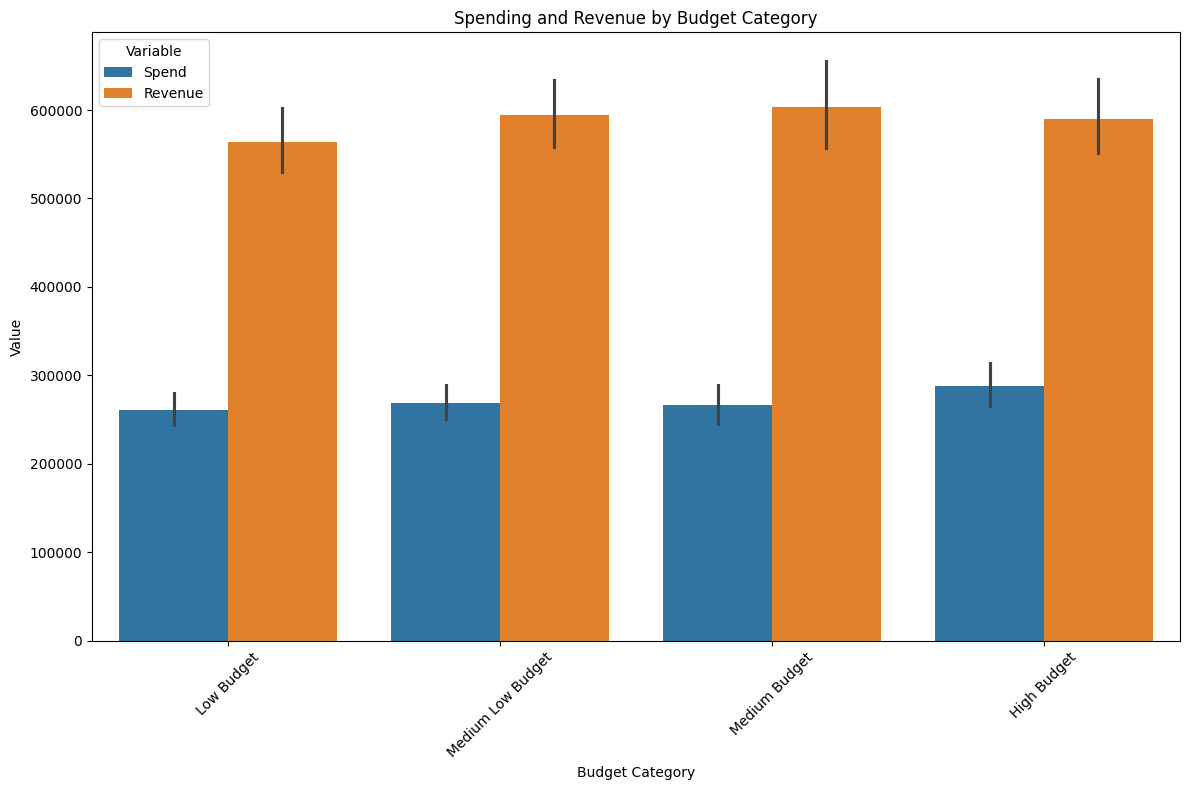

In [185]:
# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='Budget_Category', value_vars=['Spend', 'Revenue'],
                  var_name='Variable', value_name='Value')

# Create a single bar plot with hue for different variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Budget_Category', y='Value', hue='Variable', data=df_long, estimator=np.mean)

# Customize plot
plt.title('Spending and Revenue by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variable')

plt.tight_layout()
plt.show()

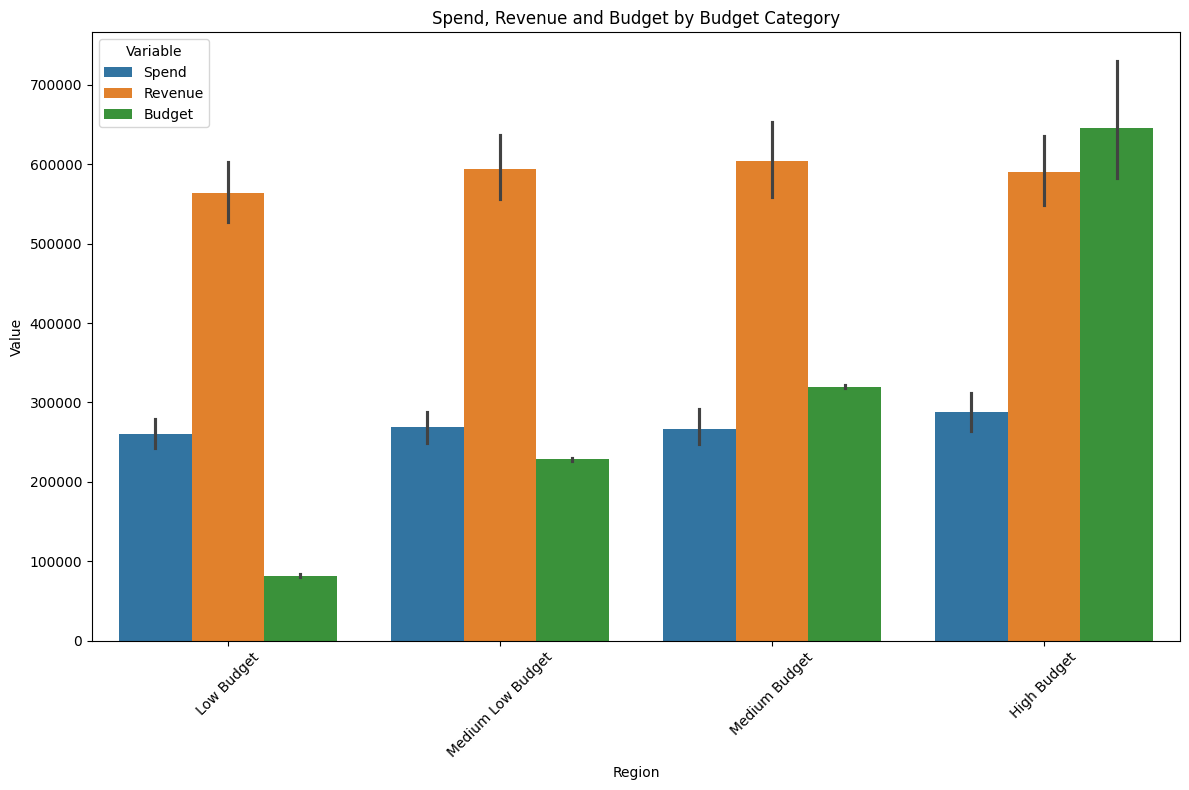

In [188]:
# Reshape the data to long format for easier plotting
df_long = df.melt(id_vars='Budget_Category', value_vars=['Spend', 'Revenue','Budget'],
                  var_name='Variable', value_name='Value')

# Create a single bar plot with hue for different variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Budget_Category', y='Value', hue='Variable', data=df_long, estimator=np.mean)

# Customize plot
plt.title('Spend, Revenue and Budget by Budget Category')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Variable')

plt.tight_layout()
plt.show()

Analyzing customer satisfaction and campaign effectiveness

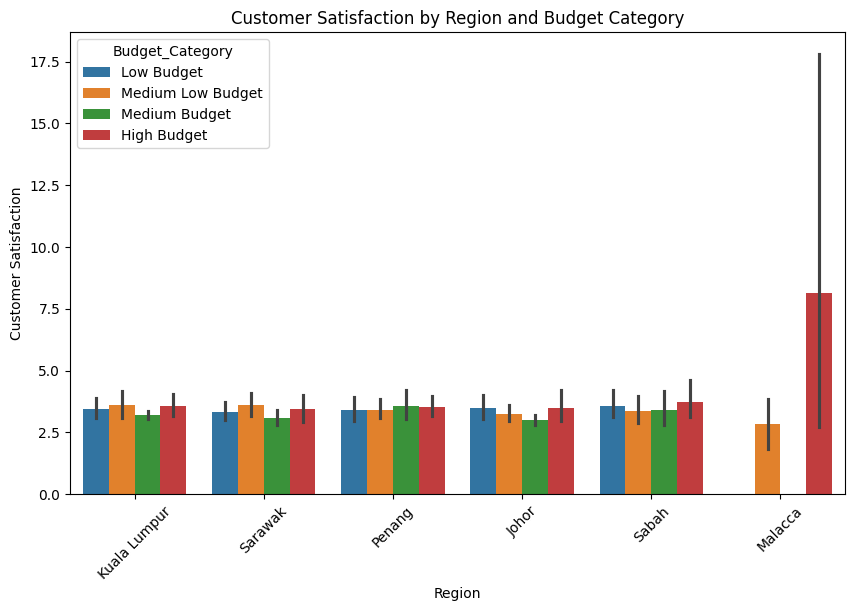

In [350]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Customer_Satisfaction', data=df, hue='Budget_Category', estimator=np.mean)
plt.title('Customer Satisfaction by Region and Budget Category')
plt.xlabel('Region')
plt.ylabel('Customer Satisfaction')
plt.xticks(rotation=45)
plt.show()

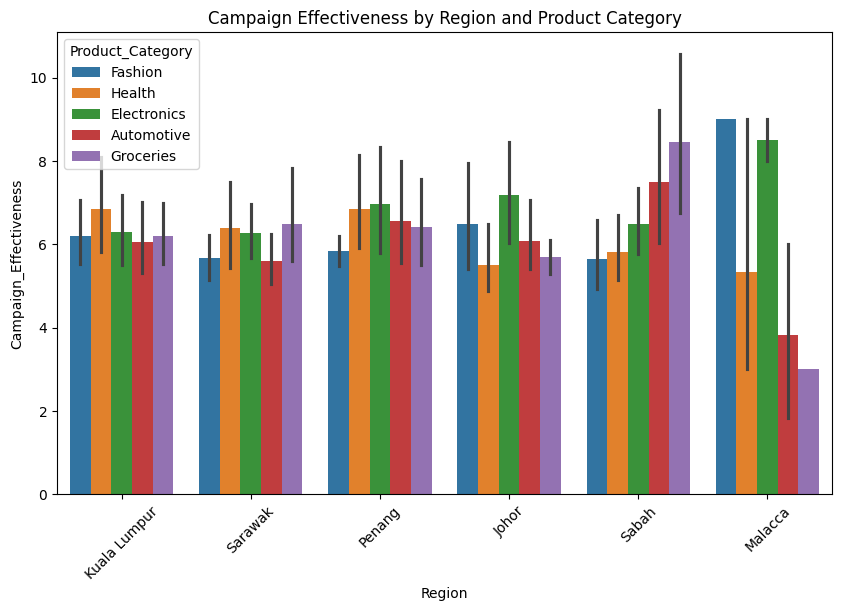

In [351]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Campaign_Effectiveness', data=df, hue='Product_Category', estimator=np.mean)
plt.title('Campaign Effectiveness by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Campaign_Effectiveness')
plt.xticks(rotation=45)
plt.show()

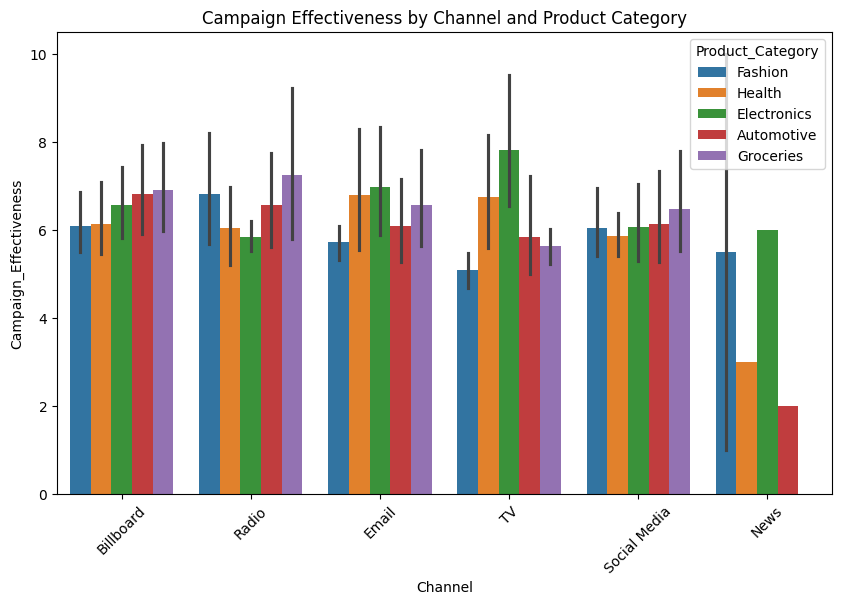

In [352]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Campaign_Effectiveness', data=df, hue='Product_Category', estimator=np.mean)
plt.title('Campaign Effectiveness by Channel and Product Category')
plt.xlabel('Channel')
plt.ylabel('Campaign_Effectiveness')
plt.xticks(rotation=45)
plt.show()

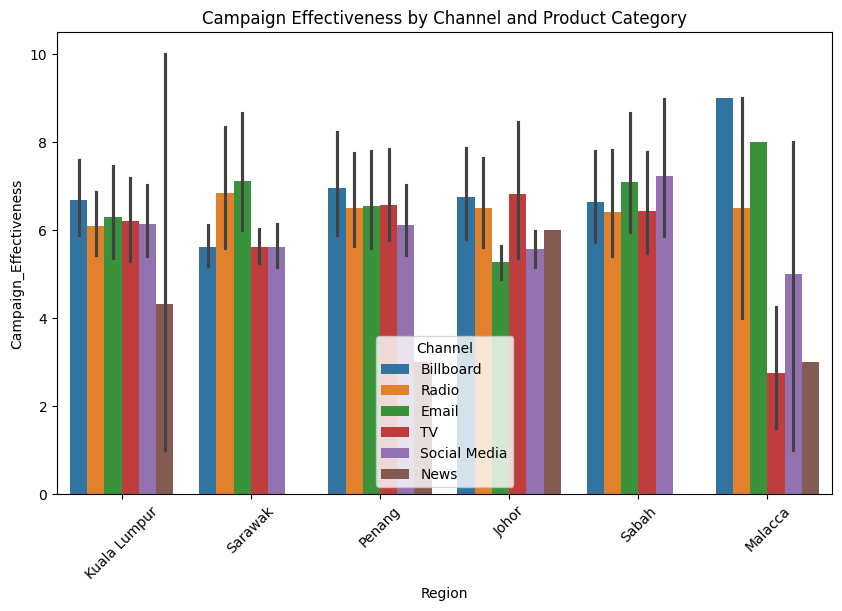

In [353]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Campaign_Effectiveness', data=df, hue='Channel', estimator=np.mean)
plt.title('Campaign Effectiveness by Channel and Product Category')
plt.xlabel('Region')
plt.ylabel('Campaign_Effectiveness')
plt.xticks(rotation=45)
plt.show()

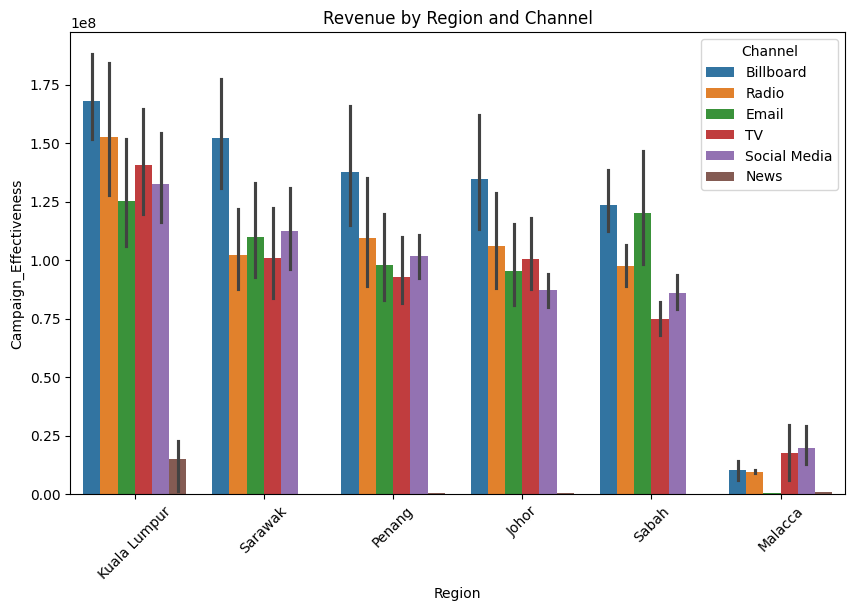

In [354]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Revenue', data=df, hue='Channel', estimator=sum)
plt.title('Revenue by Region and Channel')
plt.xlabel('Region')
plt.ylabel('Campaign_Effectiveness')
plt.xticks(rotation=45)
plt.show()

Highest revenue campaigns by date

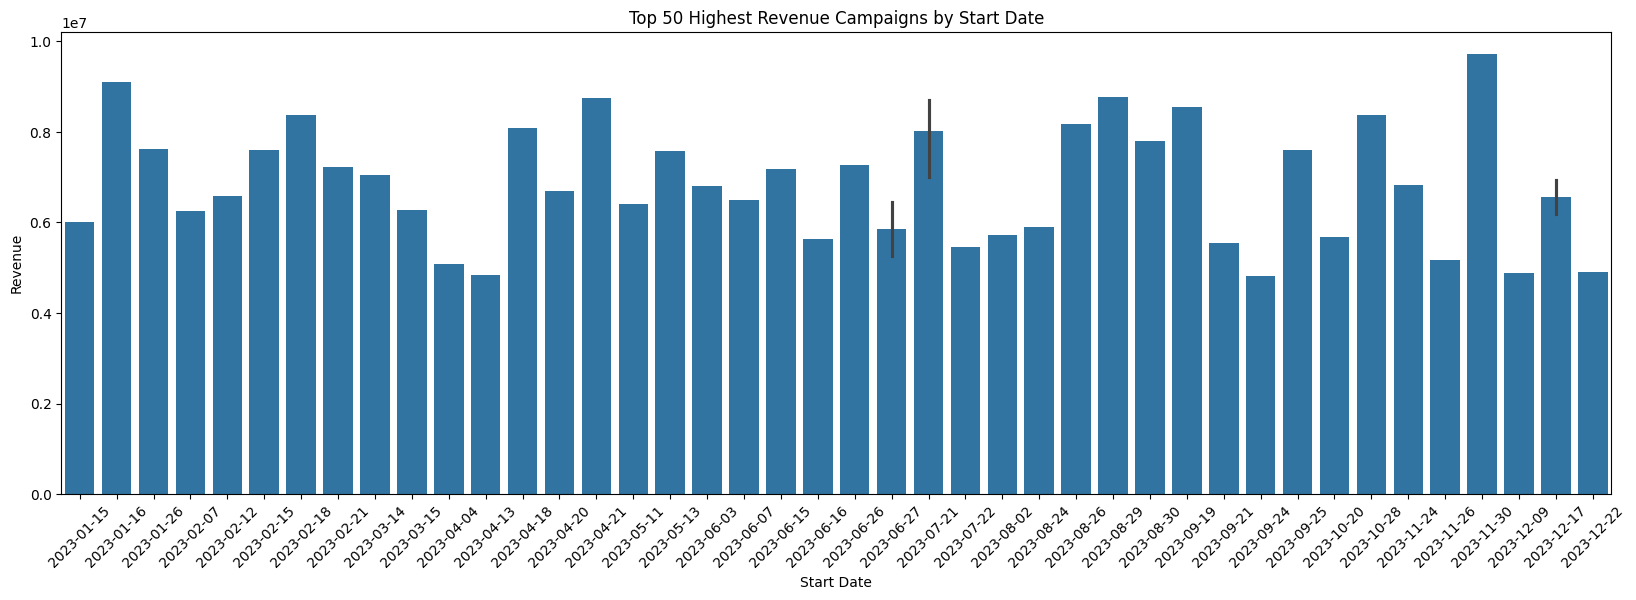

In [356]:
# Select the top 100 highest revenue campaigns
top_revenue_campaigns = df.nlargest(50, 'Revenue')

# Sort the DataFrame by Start_Date
top_revenue_campaigns = top_revenue_campaigns.sort_values(by='Start_Date')

# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(x='Start_Date', y='Revenue', data=top_revenue_campaigns)
plt.title('Top 50 Highest Revenue Campaigns by Start Date')
plt.xlabel('Start Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


In [357]:
#Out of these campaigns, the most repeated months
top_revenue_campaigns['Start_Date'] = pd.to_datetime(top_revenue_campaigns['Start_Date'])
top_revenue_campaigns['Month'] = top_revenue_campaigns['Start_Date'].dt.month_name()
top_revenue_campaigns['Month'].value_counts()


Month
July         8
June         7
February     5
April        5
August       5
September    4
December     4
January      3
November     3
March        2
May          2
October      2
Name: count, dtype: int64

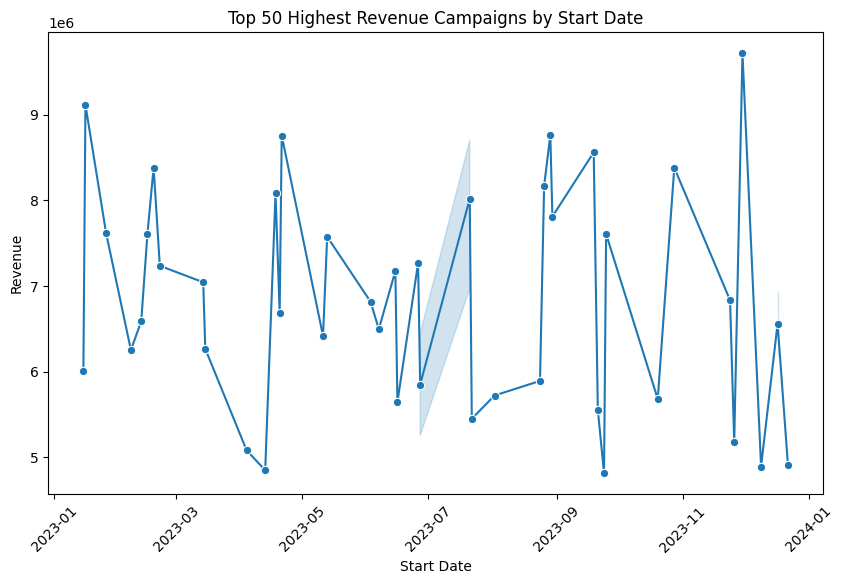

In [358]:
# Top 50 highest revenue campaigns by start date
top_revenue_campaigns = df.nlargest(50, 'Revenue')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Date', y='Revenue', data=top_revenue_campaigns, marker='o')
plt.title('Top 50 Highest Revenue Campaigns by Start Date')
plt.xlabel('Start Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

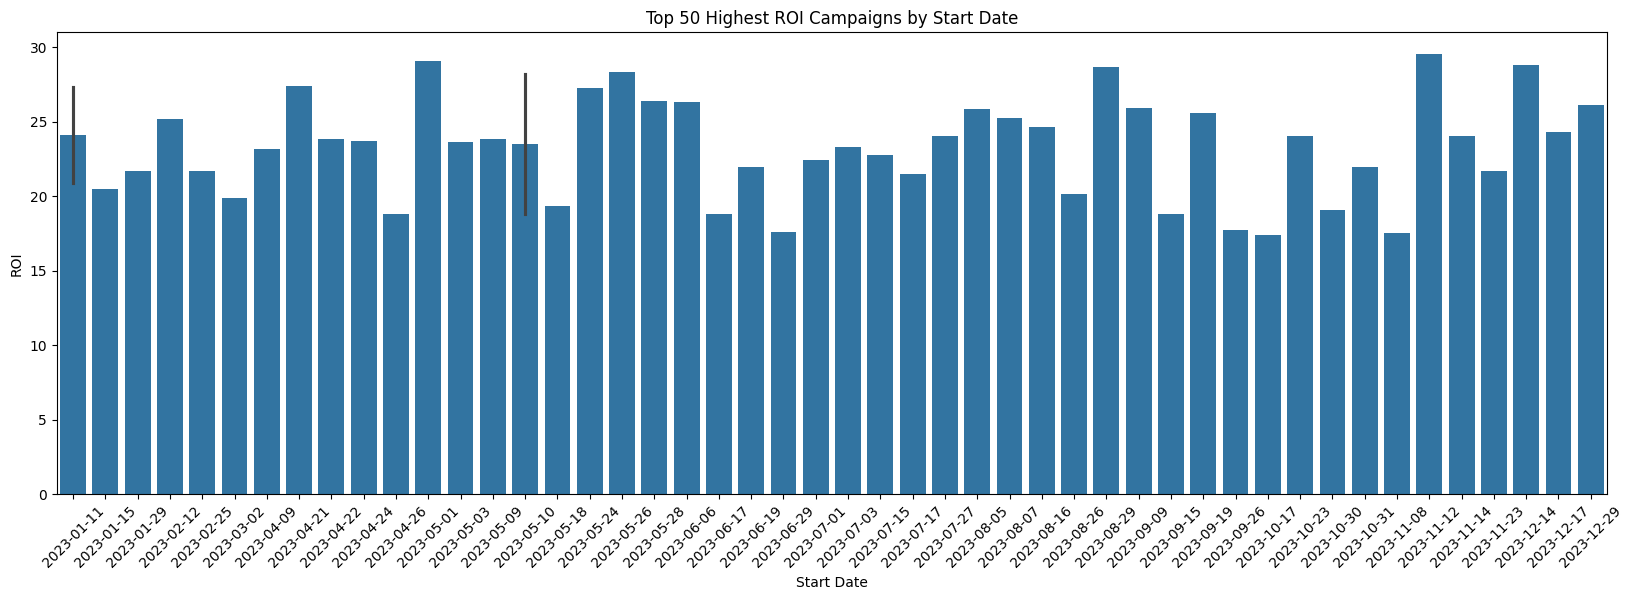

In [360]:
# Select the top 100 highest revenue campaigns
top_revenue_campaigns4 = df.nlargest(50, 'ROI')

# Sort the DataFrame by Start_Date
top_revenue_campaigns4 = top_revenue_campaigns4.sort_values(by='Start_Date')

# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(x='Start_Date', y='ROI', data=top_revenue_campaigns4, estimator=np.mean)
plt.title('Top 50 Highest ROI Campaigns by Start Date')
plt.xlabel('Start Date')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

In [361]:
top_revenue_campaigns4['Start_Date'] = pd.to_datetime(top_revenue_campaigns4['Start_Date'])
top_revenue_campaigns4['Month'] = top_revenue_campaigns4['Start_Date'].dt.month_name()
top_revenue_campaigns4['Month'].value_counts()

Month
May          9
April        5
July         5
August       5
January      4
June         4
September    4
October      4
November     4
December     3
February     2
March        1
Name: count, dtype: int64

### Step 7 - Conclusion and recommendations

Conclusions:

Most variables behave similarly across regions, products and channels.

With the current amount of data, there’s almost no correlation between the variables.

There are a lot of outliers in the data (review what happened in each case).

Something happened in July. It affected impressions, clicks and CTR.

Recommendations:

Explore the Malaccan territory

Advertise through social media and TV

Fashion and electronics

Months: July – August

Average Budget: 1230550

Average Duration: 203

Average Revenue: 4526300

Average ROI: 2.52
